 # Data Ingestion and Derived Returns Workbook

In [ ]:
import pandas as pd
import os
from sys import platform
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pickle
import seaborn
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ## Download

In [ ]:
#You can download the archived data for 2014 from the WayBack machine here:
# https://web.archive.org/web/20220618001912/https://resources.lendingclub.com/LoanStats3c.csv.zip
# For the 2015 data, use
# https://web.archive.org/web/20230522033024/https://resources.lendingclub.com/LoanStats3d.csv.zip
# Download both zip files and unzip them.
# Put both these unzipped files in the appropriate folder ("../data" below) before proceeding below.
# The data dictionary is here: https://web.archive.org/web/20200606105339/https://resources.lendingclub.com/LCDataDictionary.xlsx}
dir_data= "/content/drive/MyDrive/mini4/BizValue/Update1/data"

 ## Ingestion
 Ingest the data files from both sets, perform consistency checks, and prepare one single file for each set

In [ ]:
from typing import Dict, final
def ingest_files(directory: str) -> Dict:
    '''
    This function will ingest every file in the specified directory
    into a pandas dataframe. It will return a dictionary containing
    these dataframes, keyed by the file name.

    We assume the directory contains files directly downloaded from
    Lending Club, and *only* those files. Thus, we assume the files are zipped
    (pd.read_csv can read zipped files) and we assume the first line
    in each file needs to be skipped.

    Note that this function will read and ingest more than one file and is
    convenient if you want to ingest data for more than one year at a time.

    Note that each file will be read *without* formatting
    '''

    # If the directory has no trailing slash, add one
    if directory[-1] != "/":
        directory = directory + "/"

    all_files = os.listdir(directory)
    output = {}

    print("Directory " + directory + " has " + str(len(all_files)) + " files:")
    for i in all_files:

        if i.find('.csv')<0:
            continue

        print("    Reading file " + i)
        output[i] = pd.read_csv(directory + i, dtype = str, skiprows = 1)


    return output


In [ ]:
# Ingest the set of files we downloaded
files_data = ingest_files(dir_data)


Directory /content/drive/MyDrive/mini4/BizValue/Update1/data/ has 1 files:
    Reading file 2014.csv


In [ ]:
files_data.keys()

dict_keys(['2014.csv'])

In [ ]:
data_now = pd.concat(files_data.values()).reset_index(drop = True)
columns = list(data_now.columns)
columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

 ## Choose Columns and Prepare Dataset

In [ ]:
# Identify the columns we'll be keeping from the dataset
cols_to_pick = [ #preselecetd
                'id','loan_amnt','funded_amnt','term','int_rate',
                 'installment','grade','emp_length', 'home_ownership',
                 'annual_inc','verification_status','issue_d',
                 'loan_status','purpose','dti', 'delinq_2yrs',
                 'earliest_cr_line','open_acc','pub_rec',
                 'revol_bal','revol_util', 'total_pymnt',
                 'last_pymnt_d', 'recoveries',
                 #new selected
                 'acc_now_delinq', 'addr_state', 'bc_util',
                 'collections_12_mths_ex_med', 'mort_acc',
                 'num_bc_sats', 'num_bc_tl', 'pct_tl_nvr_dlq',
                  'pub_rec_bankruptcies', 'tax_liens', 'zip_code']



# Identify the type of each of these column
float_cols = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'total_pymnt', 'recoveries', 'acc_now_delinq',
                                'collections_12_mths_ex_med', 'mort_acc', 'num_bc_sats',
              'num_bc_tl','pub_rec_bankruptcies','tax_liens',
              'bc_util', 'pct_tl_nvr_dlq']
cat_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'zip_code',
                    'verification_status', 'loan_status', 'purpose', 'addr_state']
perc_cols = ['int_rate', 'revol_util' ]
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']

# Ensure that we have types for every column
assert set(cols_to_pick) - set(float_cols) - set(cat_cols) - set(perc_cols) - set(date_cols) == set(["id"])

In [ ]:
# Keep only the columns of interest
final_data = data_now[cols_to_pick].copy()


In [ ]:
print("Starting with " + str(len(final_data)) + " rows")

Starting with 235631 rows


 ### Suggestions

 You can choose a few more (3-10) variables and add them to the list of variables below

 You should consult the data description (excel) file you downloaded to understand the definition of various available columns

 TIP: If you added new variables, be sure to clean them as we just did for the default variables.

 You will have to add them to the group of the right type of variables (e.g. percentage, date, categorical)


In [ ]:
#Reading data dictionary for refernce
dataDict = pd.read_excel('/content/drive/MyDrive/mini4/BizValue/Update1/LCDataDictionary.xlsx')

 ### Typecast the columns and remove nulls

In [ ]:
for i in float_cols:
    final_data[i] = final_data[i].astype(float)

def clean_perc(x):
    if pd.isnull(x):
        return np.nan
    else:
        return float(x.rstrip()[:-1])
for i in perc_cols:
    final_data[i] = final_data[i].apply( clean_perc )

def clean_date(x):
    if pd.isnull(x):
        return None
    else:
        return datetime.datetime.strptime( x, "%b-%Y").date()
for i in date_cols:
    final_data[i] = final_data[i].apply( clean_date )

for i in cat_cols:
    final_data.loc[final_data[i].isnull(), i] = None

final_data['zip_code'] = final_data['zip_code'].str.replace('xx', '', regex=False)

In [ ]:
#Removing the id columns - since the id column is null
final_data.drop('id', axis=1, inplace=True)

In [ ]:
# Deal with null values. We allow categorical variables to be null
# OTHER than grade, which is a particularly important categorical.
# All non-categorical variables must be non-null, and we drop
# rows that do not meet this requirement
required_cols = set(cols_to_pick) - set(cat_cols) - set(["id"])
required_cols.add("grade")

n_rows = len(final_data)
final_data.dropna(subset = required_cols ,inplace=True)
print("Removed " + str(n_rows - len(final_data)) + " rows")

Removed 2747 rows


In [ ]:
final_data['credit_line_loan_gap'] = (final_data.issue_d - final_data.earliest_cr_line)/np.timedelta64(365, 'D')

float_cols = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'total_pymnt', 'recoveries', 'acc_now_delinq',
                                'collections_12_mths_ex_med', 'mort_acc', 'num_bc_sats',
              'num_bc_tl','pub_rec_bankruptcies','tax_liens',
              'bc_util', 'pct_tl_nvr_dlq', 'credit_line_loan_gap']

In [ ]:
final_data.head().T

0             1  \
loan_amnt                              15000.0       10400.0   
funded_amnt                            15000.0       10400.0   
term                                 60 months     36 months   
int_rate                                 12.39          6.99   
installment                             336.64        321.08   
grade                                        C             A   
emp_length                           10+ years       8 years   
home_ownership                            RENT      MORTGAGE   
annual_inc                             78000.0       58000.0   
verification_status            Source Verified  Not Verified   
issue_d                             2014-12-01    2014-12-01   
loan_status                         Fully Paid   Charged Off   
purpose                     debt_consolidation   credit_card   
dti                                      12.03         14.92   
delinq_2yrs                                0.0           0.0   
earliest_cr_line                    1994-08-01    1989-09-01   
open_acc                                   6.0          17.0   
pub_rec                                    0.0           0.0   
revol_bal                             138008.0        6133.0   
revol_util                                29.0          31.6   
total_pymnt                           17392.37       6611.69   
last_pymnt_d                        2016-06-01    2016-08-01   
recoveries                                 0.0        521.27   
acc_now_delinq                             0.0           0.0   
addr_state                                  VA            CA   
bc_util                                    4.7          41.5   
collections_12_mths_ex_med                 0.0           0.0   
mort_acc                                   0.0           1.0   
num_bc_sats                                1.0           7.0   
num_bc_tl                                  2.0          18.0   
pct_tl_nvr_dlq                           100.0          83.3   
pub_rec_bankruptcies                       0.0           0.0   
tax_liens                                  0.0           0.0   
zip_code                                   235           937   
credit_line_loan_gap                 20.347945     25.265753   

                                             2             3                4  
loan_amnt                               7650.0       12800.0          21425.0  
funded_amnt                             7650.0       12800.0          21425.0  
term                                 36 months     60 months        60 months  
int_rate                                 13.66         17.14            15.59  
installment                              260.2        319.08           516.36  
grade                                        C             D                D  
emp_length                            < 1 year     10+ years          6 years  
home_ownership                            RENT      MORTGAGE             RENT  
annual_inc                             50000.0      125000.0          63800.0  
verification_status            Source Verified      Verified  Source Verified  
issue_d                             2014-12-01    2014-12-01       2014-12-01  
loan_status                        Charged Off    Fully Paid       Fully Paid  
purpose                     debt_consolidation           car      credit_card  
dti                                      34.81          8.31            18.49  
delinq_2yrs                                0.0           1.0              0.0  
earliest_cr_line                    2002-08-01    2000-10-01       2003-08-01  
open_acc                                  11.0           8.0             10.0  
pub_rec                                    0.0           0.0              0.0  
revol_bal                              16822.0        5753.0          16374.0  
revol_util                                91.9         100.9             76.2  
total_pymnt                            2281.98  19165.351925

### Seeing Feature Impact

In [ ]:
final_data.home_ownership.value_counts()

home_ownership
MORTGAGE    118462
RENT         91711
OWN          22710
ANY              1
Name: count, dtype: int64

In [ ]:
# Since there is only one record with type "any", we have removed it
final_data = final_data[final_data.home_ownership != 'ANY']

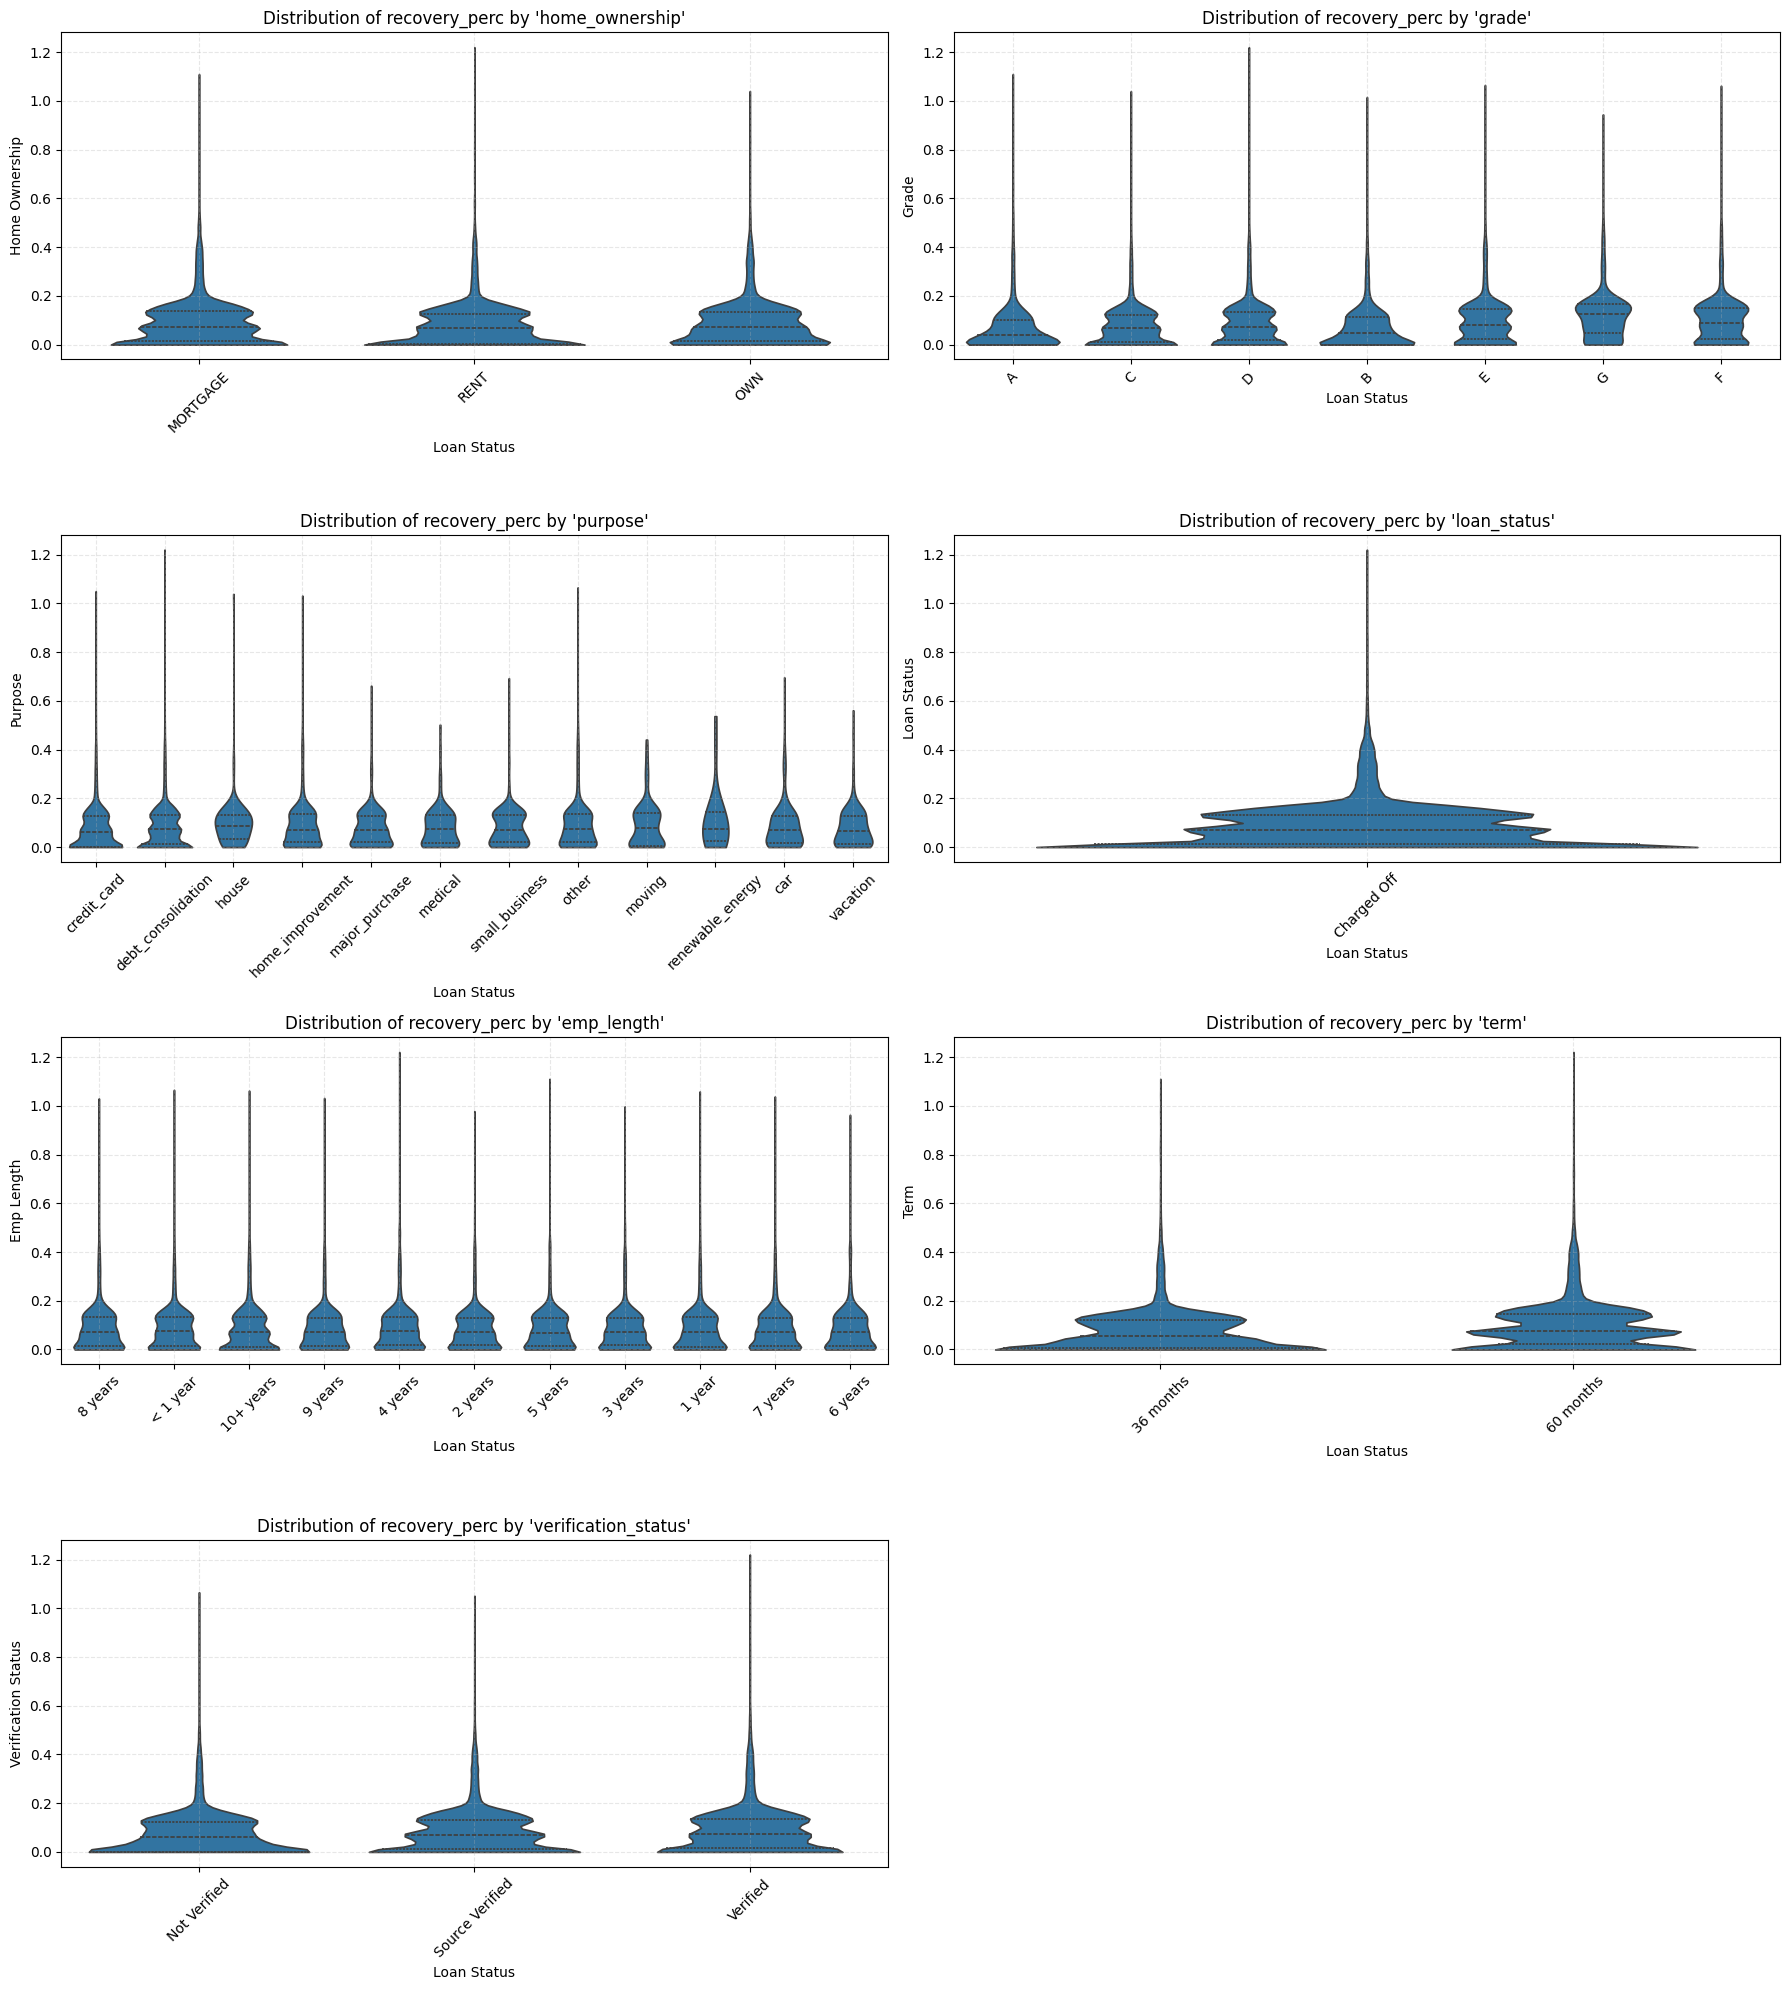

In [ ]:
# Filter the code to only include the charged-off loans and calculate each loan's recovery
# percentage. Create violin plots to observe how it varies across several features.

temp = final_data[final_data.loan_status=="Charged Off"]
temp["recovery_perc"] = temp['recoveries']/temp['loan_amnt']

# Combine float and percentage columns
plot_cols = set(cat_cols) - set(['addr_state','zip_code','earliest_cr_line','last_pymnt_d'])
n_cols = 2  # number of plots per row
n_rows = math.ceil(len(plot_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for idx, col in enumerate(plot_cols):
    ax = axes[idx]
    sns.violinplot(data=temp, x=col, y='recovery_perc', ax=ax, inner='quartile', cut=0)
    ax.set_title(f"Distribution of recovery_perc by '{col}'", fontsize=12)
    ax.set_xlabel("Loan Status", fontsize=10)
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

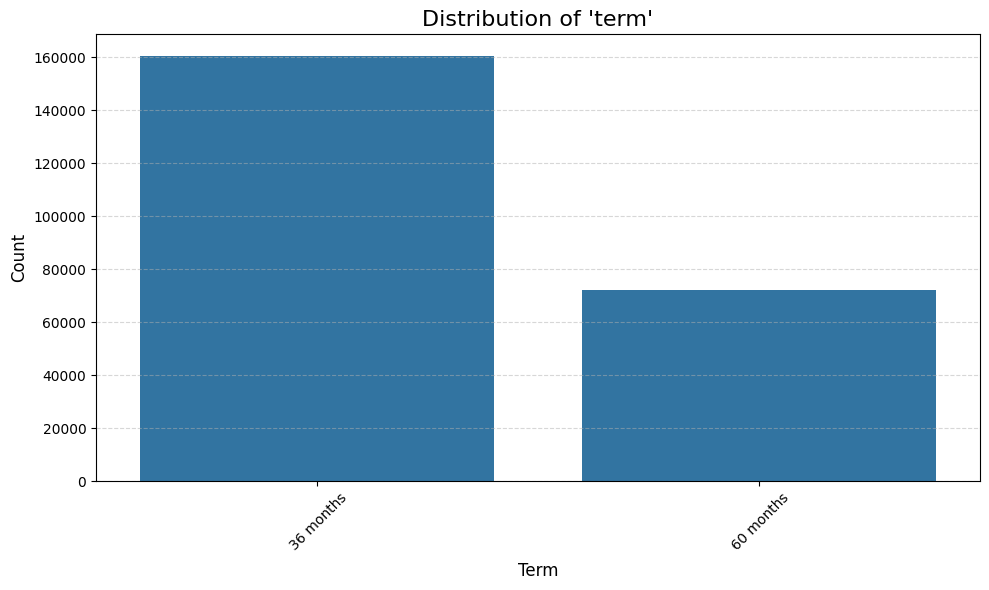

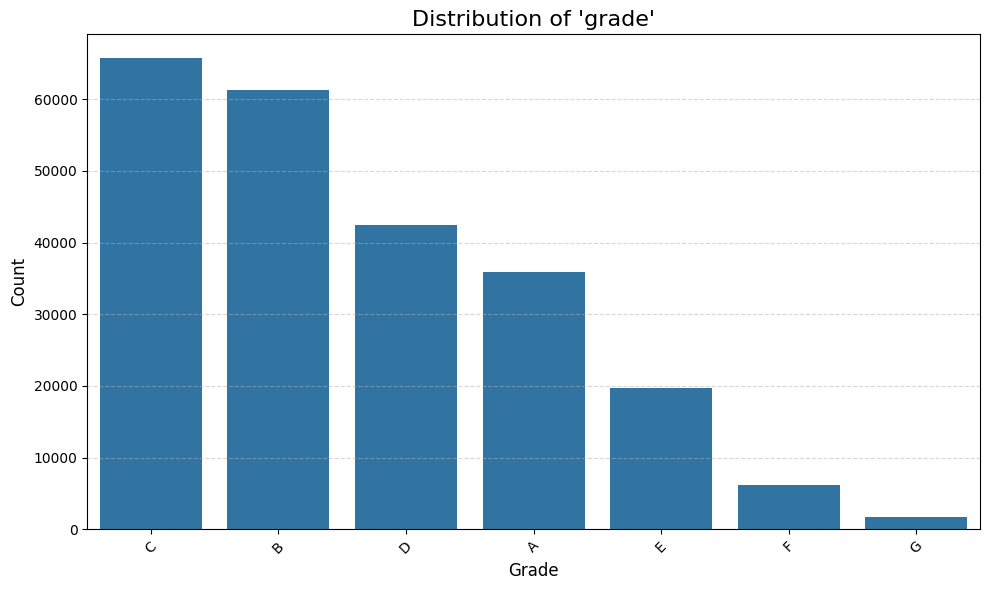

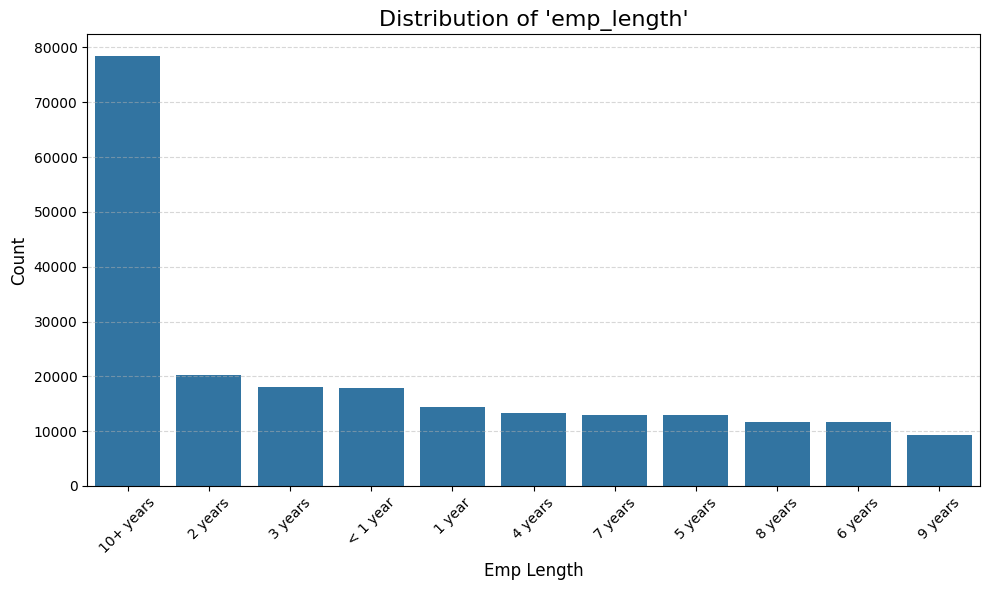

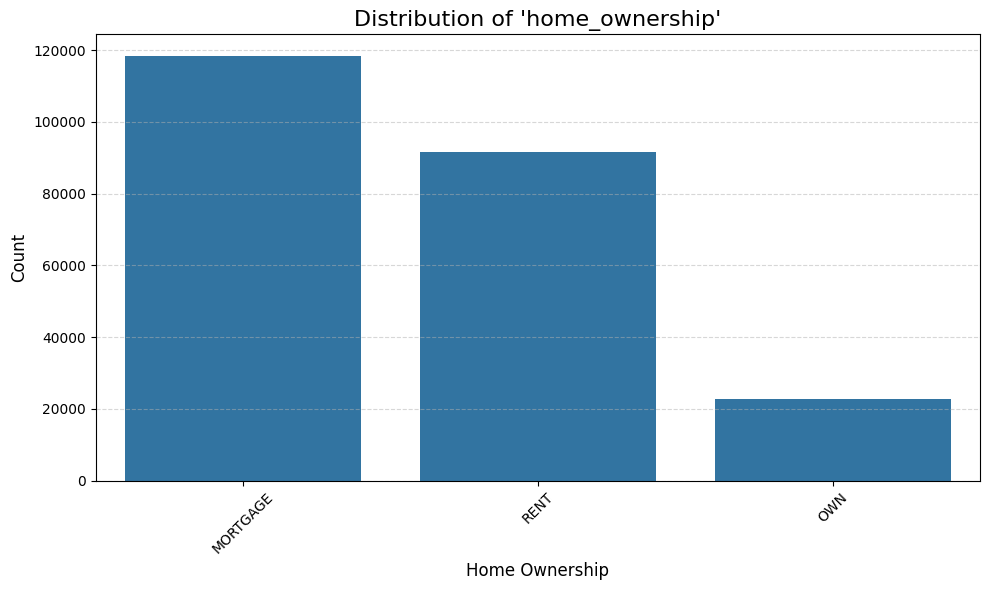

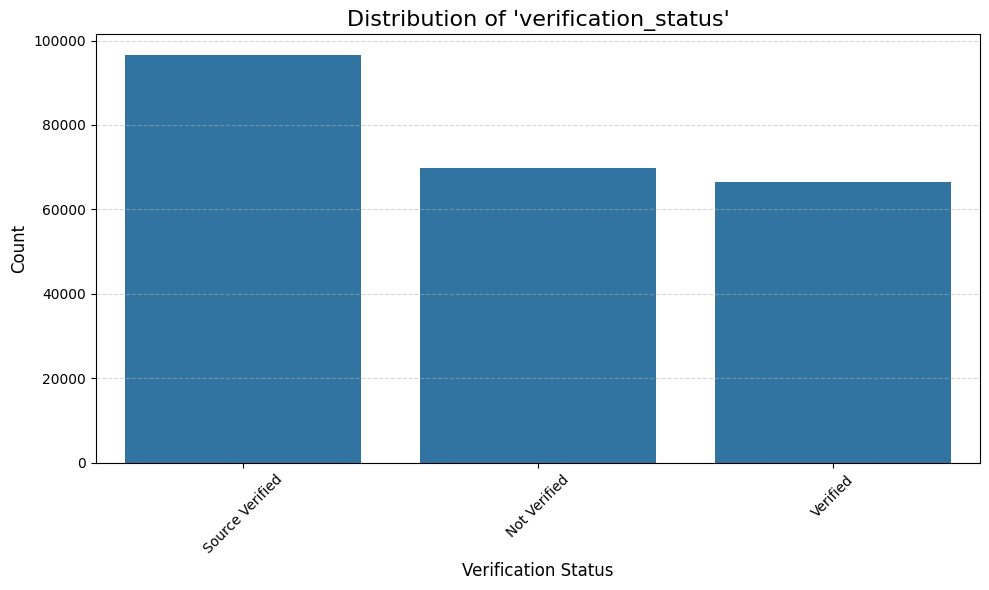

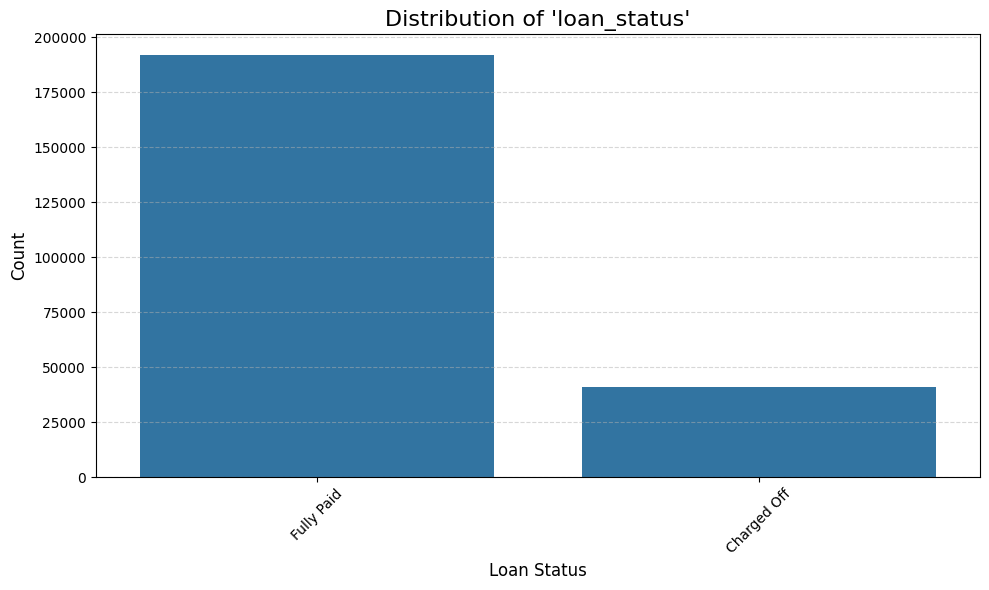

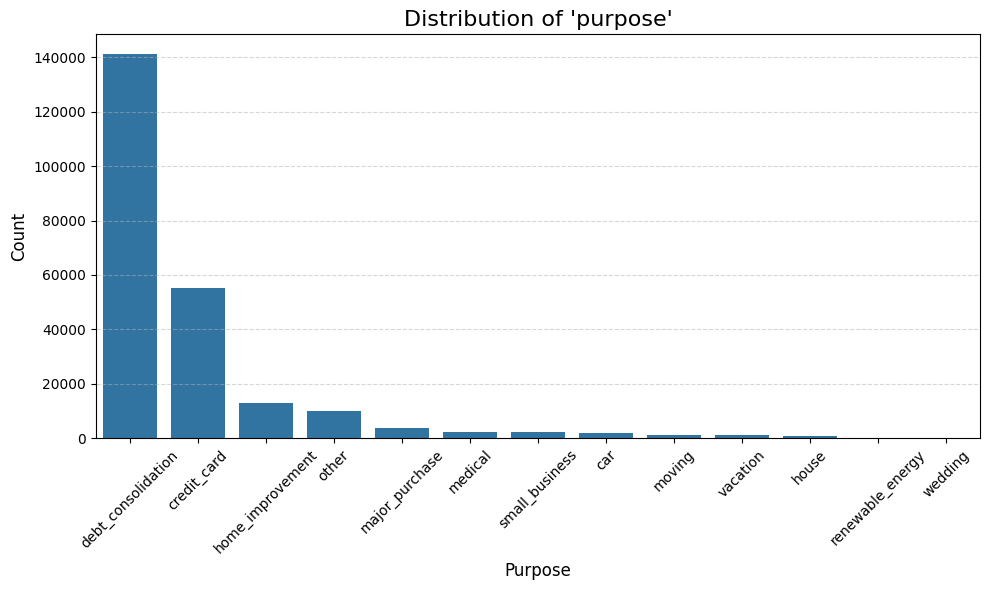

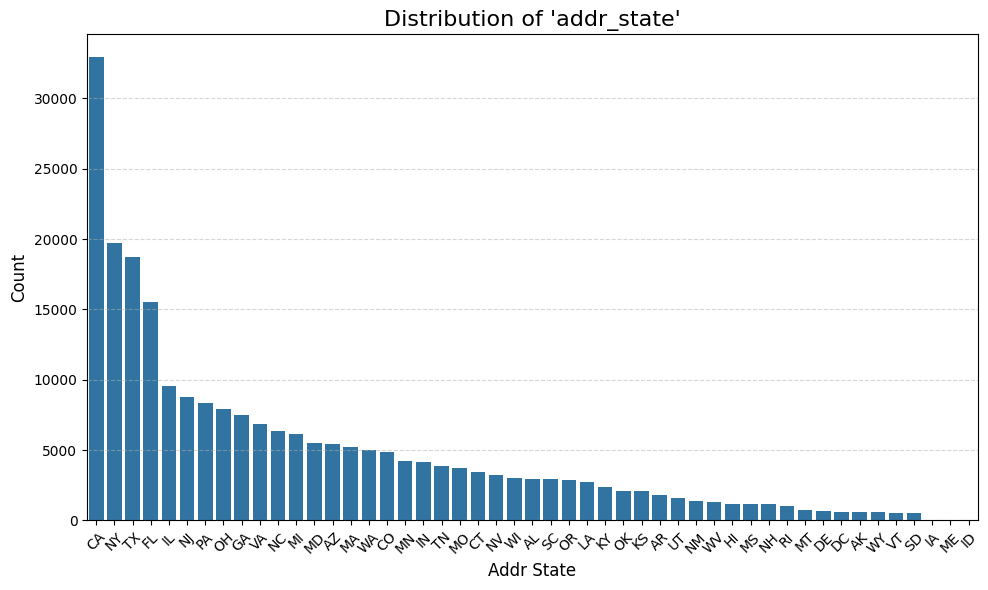

In [ ]:
# Iterate through the variables to visualize the frequency of ech category.

for i in cat_cols:
    if i == 'zip_code':
        continue  # Skip zip_code

    plt.figure(figsize=(10, 6))
    sorted_order = final_data[i].value_counts().index  # Sort by frequency
    sns.countplot(data=final_data, x=i, order=sorted_order)

    plt.title(f"Distribution of '{i}'", fontsize=16)
    plt.xlabel(i.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

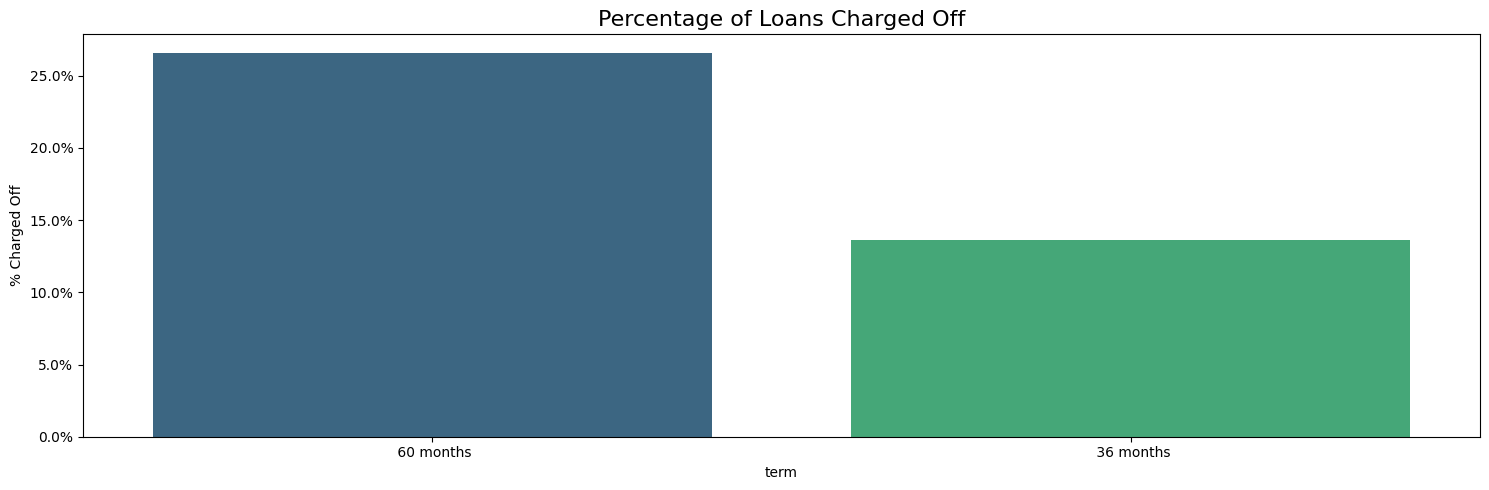

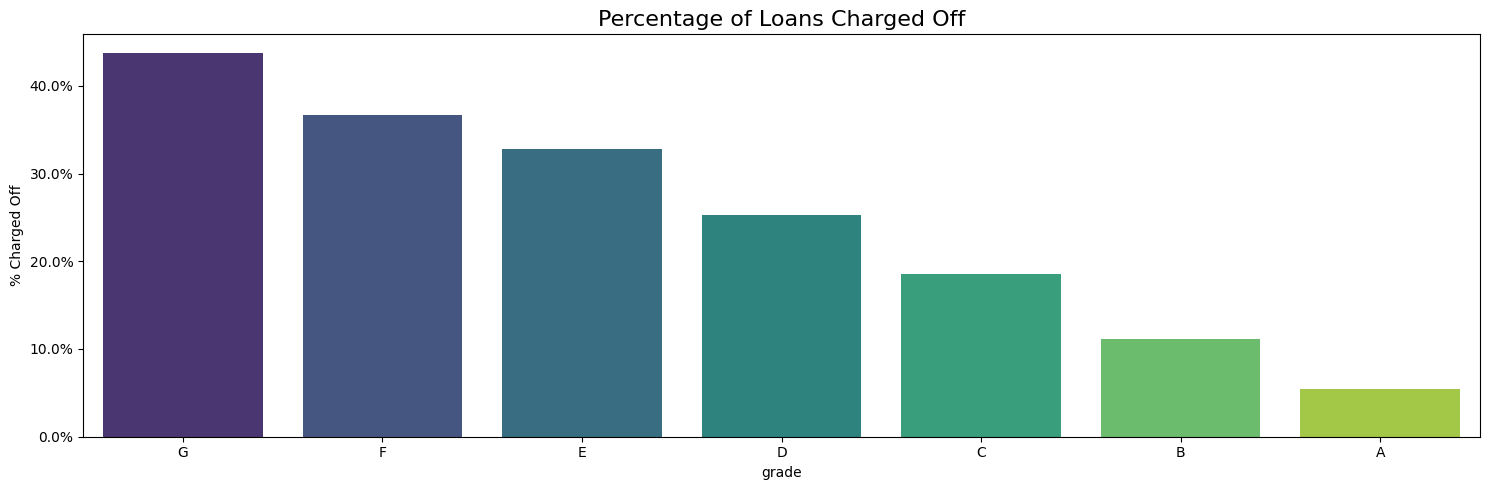

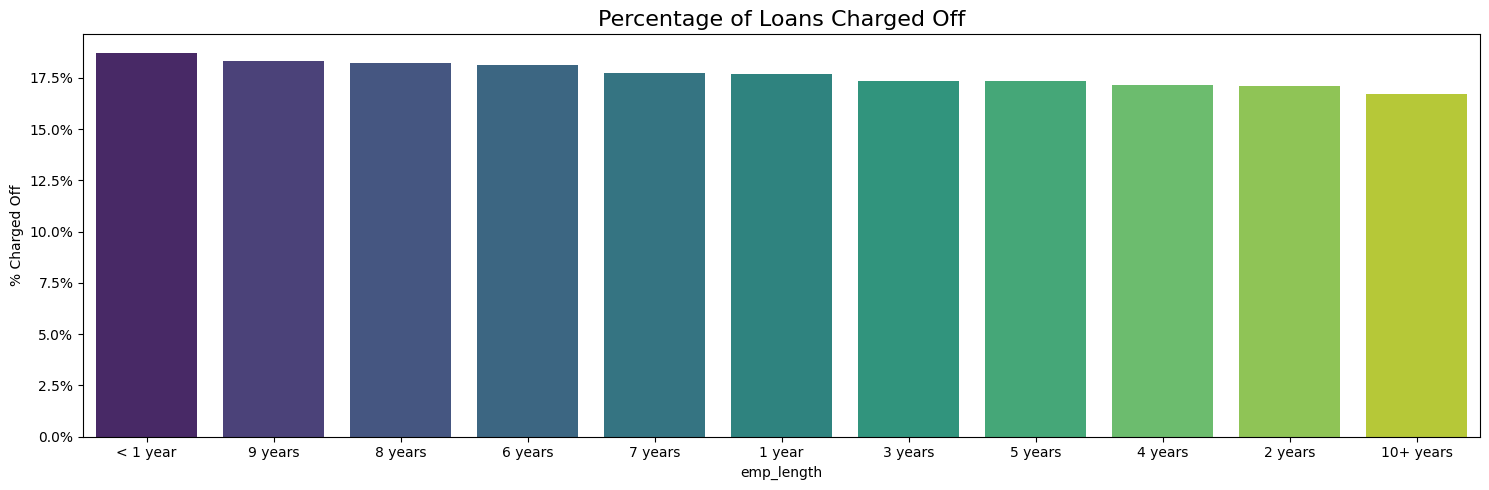

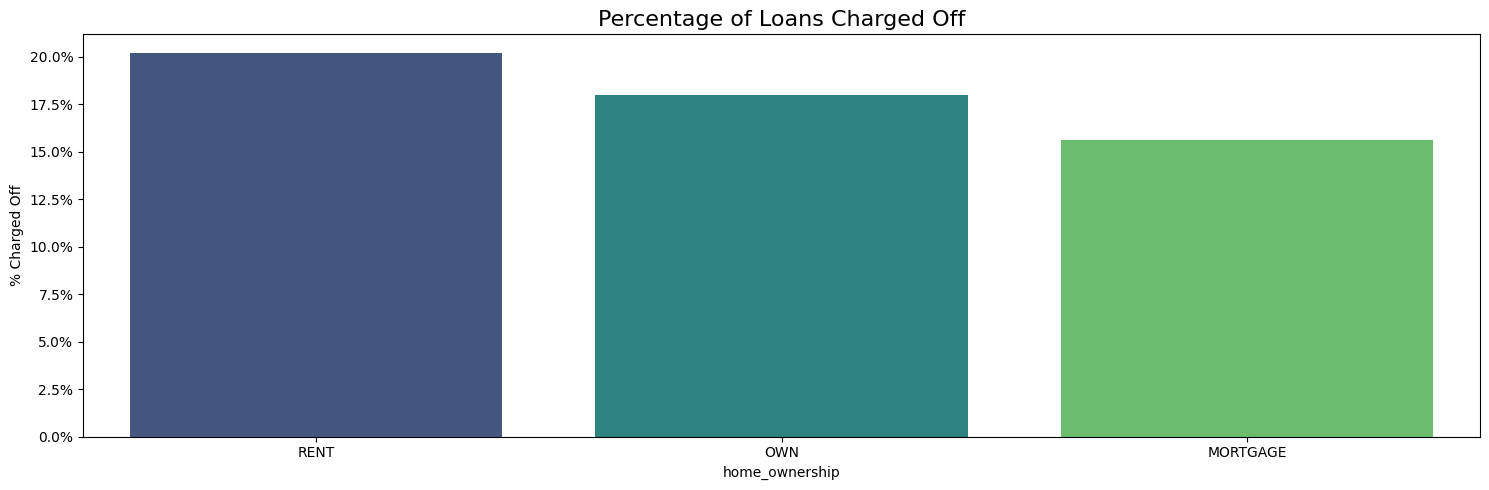

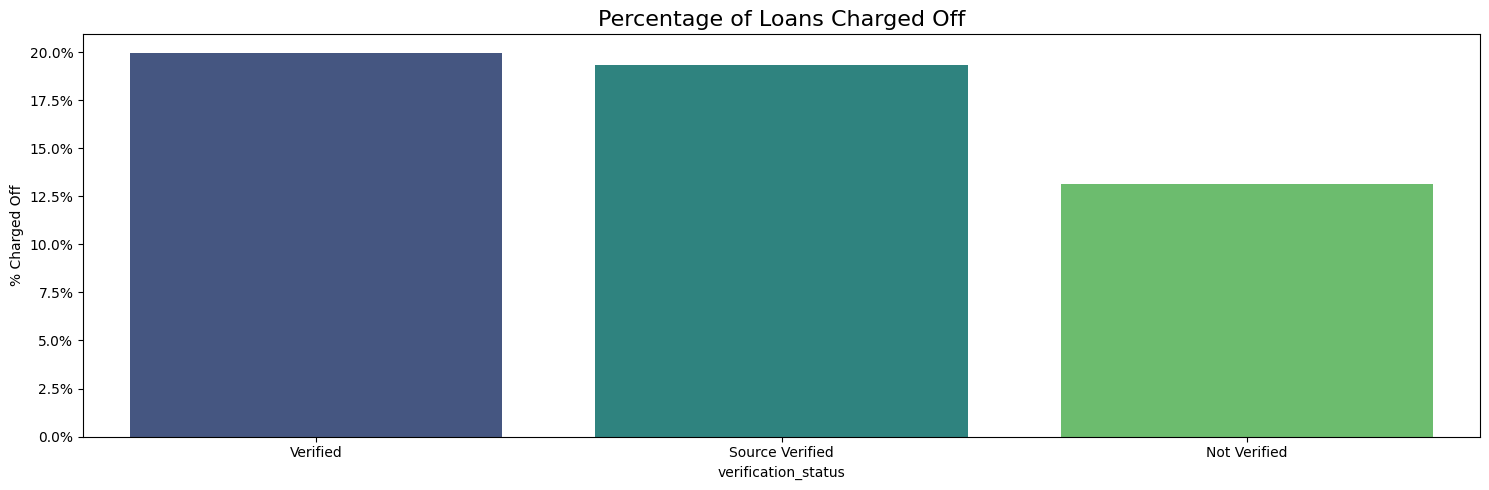

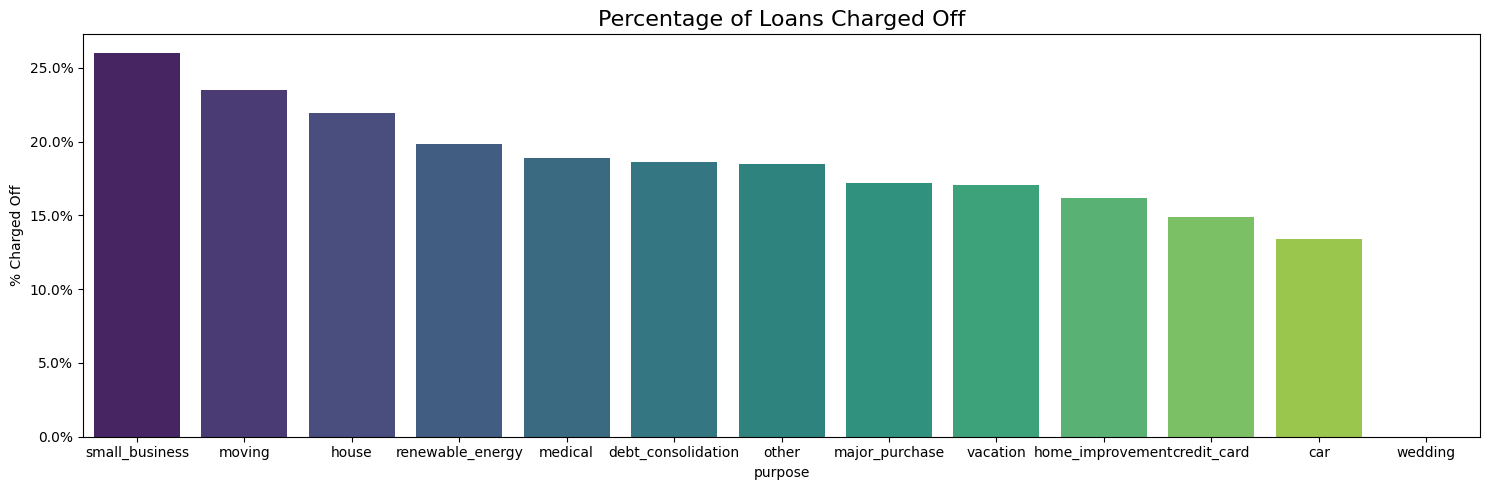

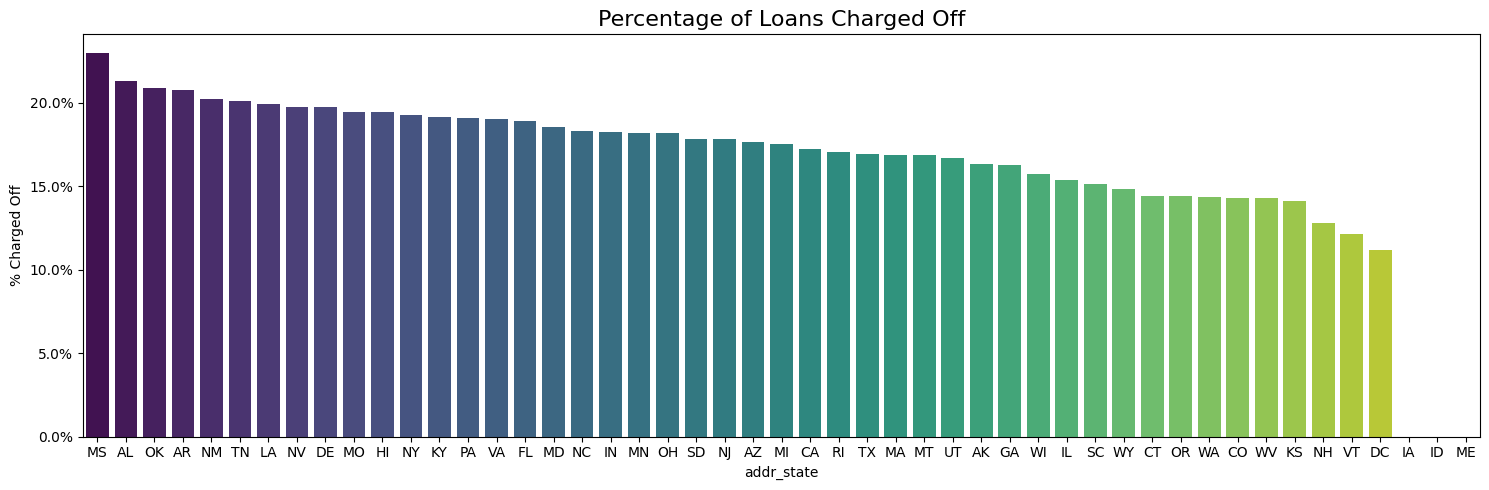

In [ ]:
# iterate through categorical features and plot the percentage of charged-off
# loans in each category.

for i in cat_cols:
  if i == 'zip_code' or i == 'loan_status' or i == 'last_pymnt_d' or i == 'earliest_cr_line':
    continue  # Skip zip_code
  counts = final_data[[i, 'loan_status']].value_counts().reset_index(name='count')

  # Step 2: Pivot the data to get counts for each status per grade
  pivot_df = counts.pivot(index=i, columns='loan_status', values='count').fillna(0)

  # Step 3: Calculate % Charged Off
  pivot_df['% Charged Off'] = (pivot_df['Charged Off'] / pivot_df.sum(axis=1)) * 100

  # Step 4: Plot the result
  pivot_df = pivot_df.sort_values('% Charged Off', ascending=False)  # Optional sorting

  plt.figure(figsize=(15, 5))
  sns.barplot(x=pivot_df.index, y=pivot_df['% Charged Off'], palette='viridis')

  plt.title("Percentage of Loans Charged Off", fontsize=16)
  plt.ylabel("% Charged Off")
  plt.xlabel(i)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  plt.tight_layout()
  plt.show()

These plots help us see how default rate varies by categorical variables.

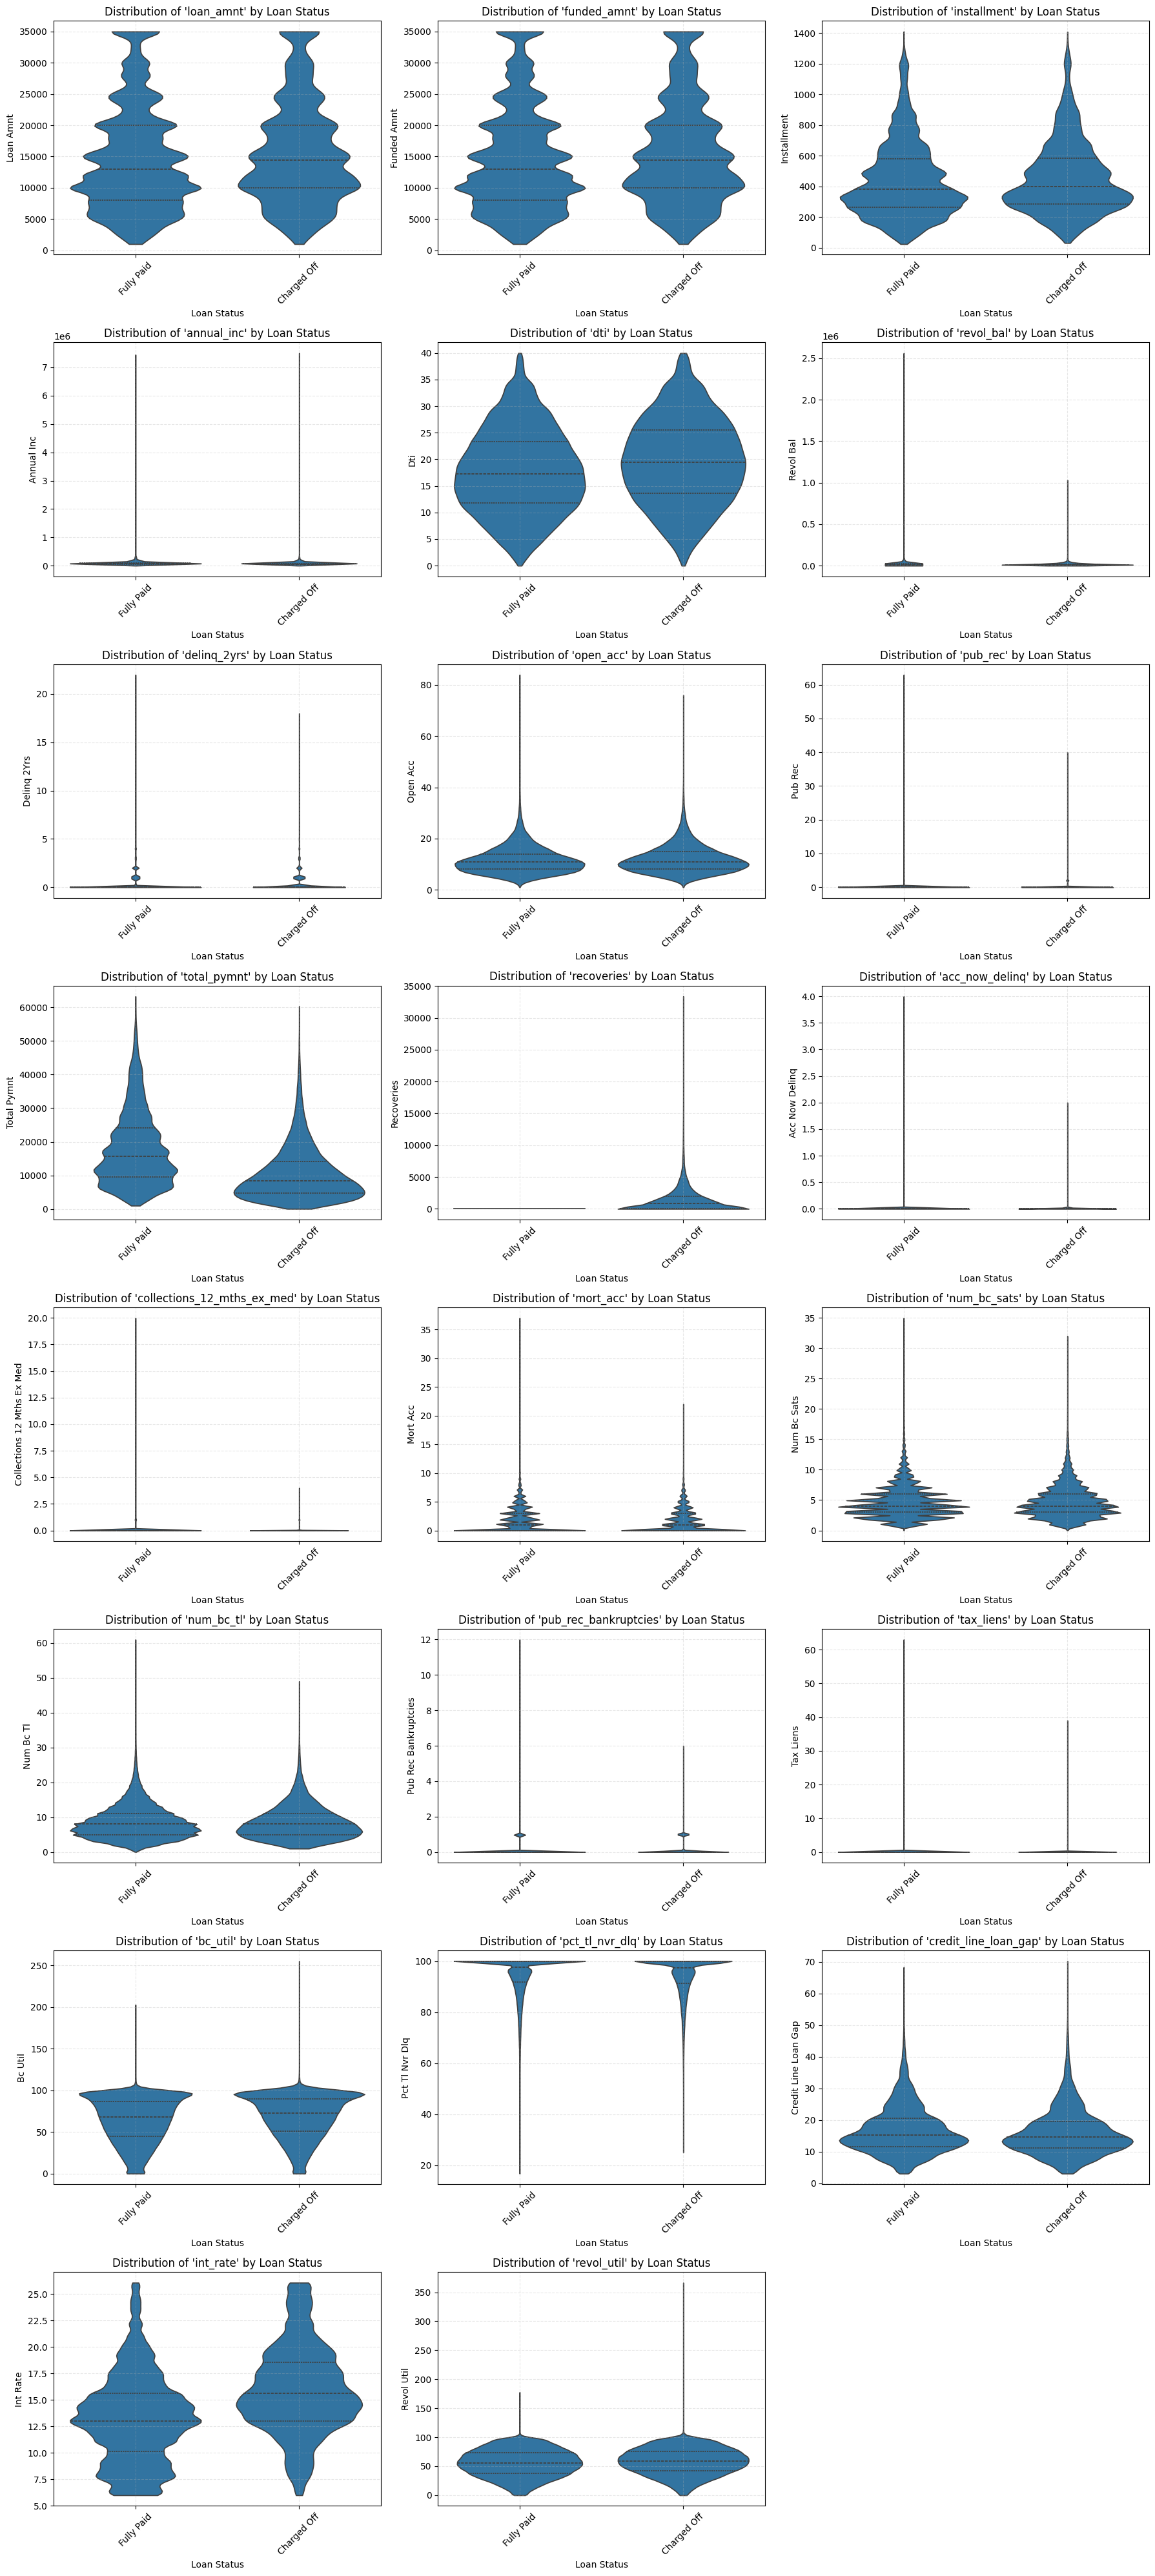

In [ ]:
# Generate violin plots for each numeric column grouped by loan status.

# Combine float and percentage columns
plot_cols = float_cols + perc_cols
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(plot_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for idx, col in enumerate(plot_cols):
    ax = axes[idx]
    sns.violinplot(data=final_data, x='loan_status', y=col, ax=ax, inner='quartile', cut=0)
    ax.set_title(f"Distribution of '{col}' by Loan Status", fontsize=12)
    ax.set_xlabel("Loan Status", fontsize=10)
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

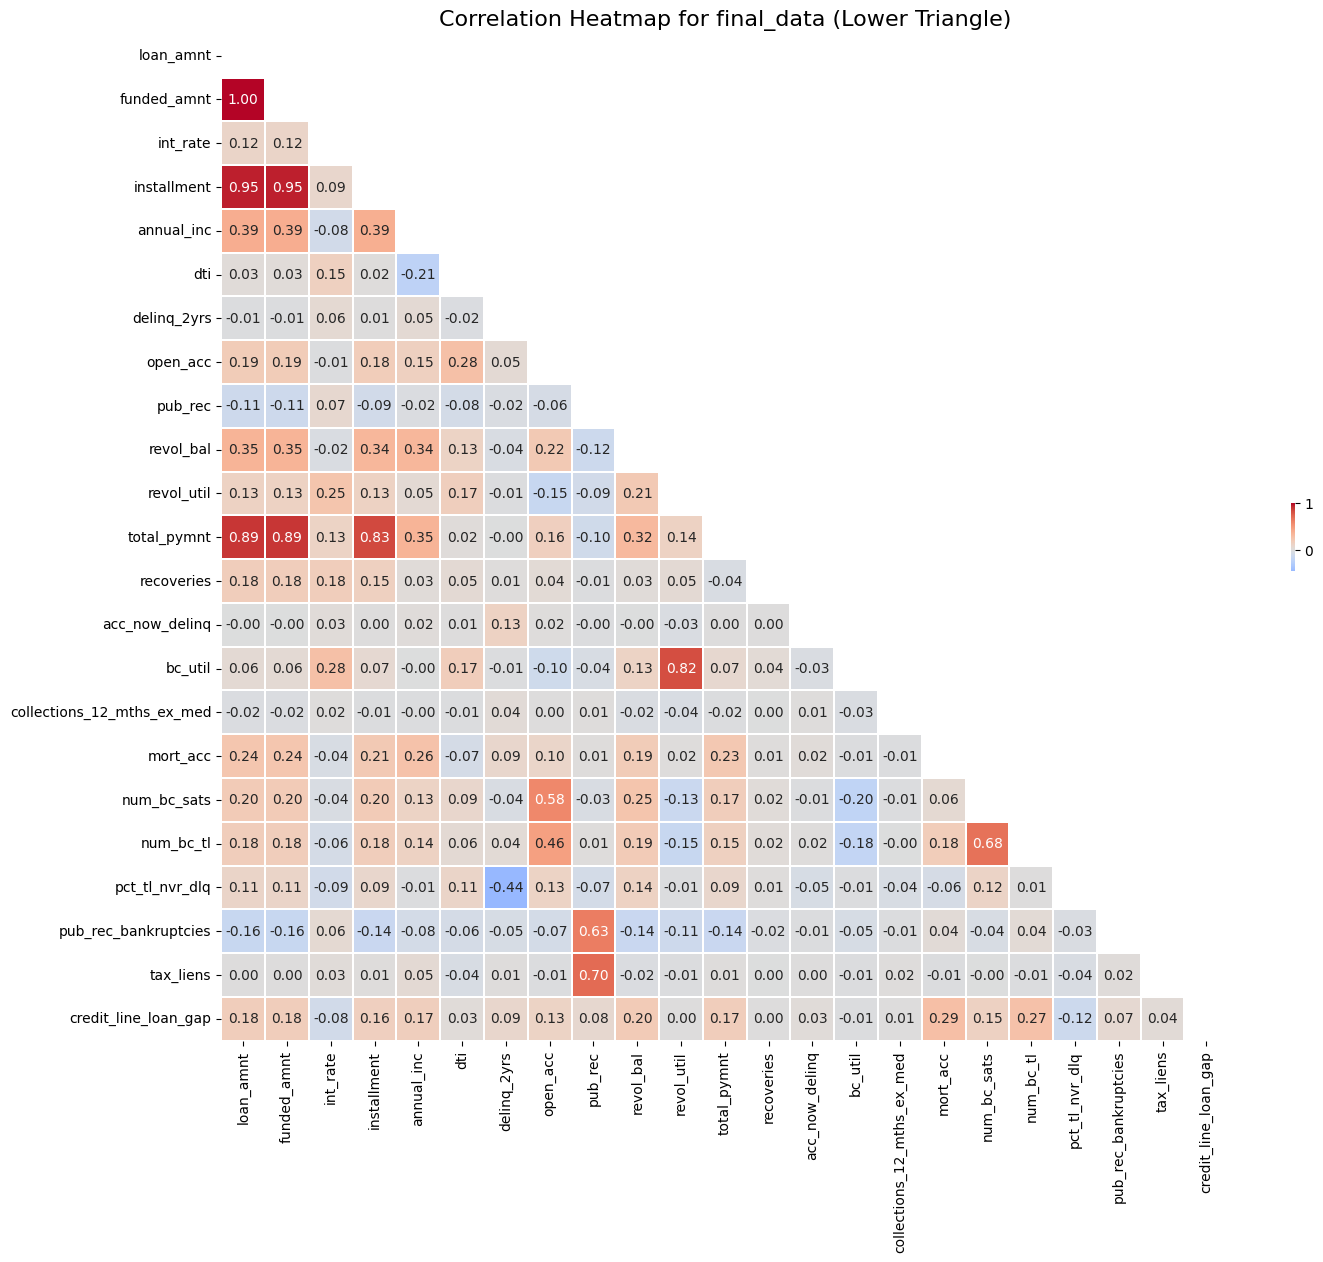

In [ ]:
# Calculate correlation matrix for the numeric columns

# Calculate the correlation matrix
corr_matrix = final_data.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,         # Show correlation coefficients
    fmt=".2f",          # Format numbers to 2 decimal places
    linewidths=0.2,
    center=0,
    square=True,
    cbar_kws={"shrink": .05}  # Color bar size
)

# Titles and layout
plt.title("Correlation Heatmap for final_data (Lower Triangle)", fontsize=16)
plt.tight_layout()
plt.show()

We observe that funded amount and loan amount have a correlation of almost 1, so for most calculations, we will be using only either.

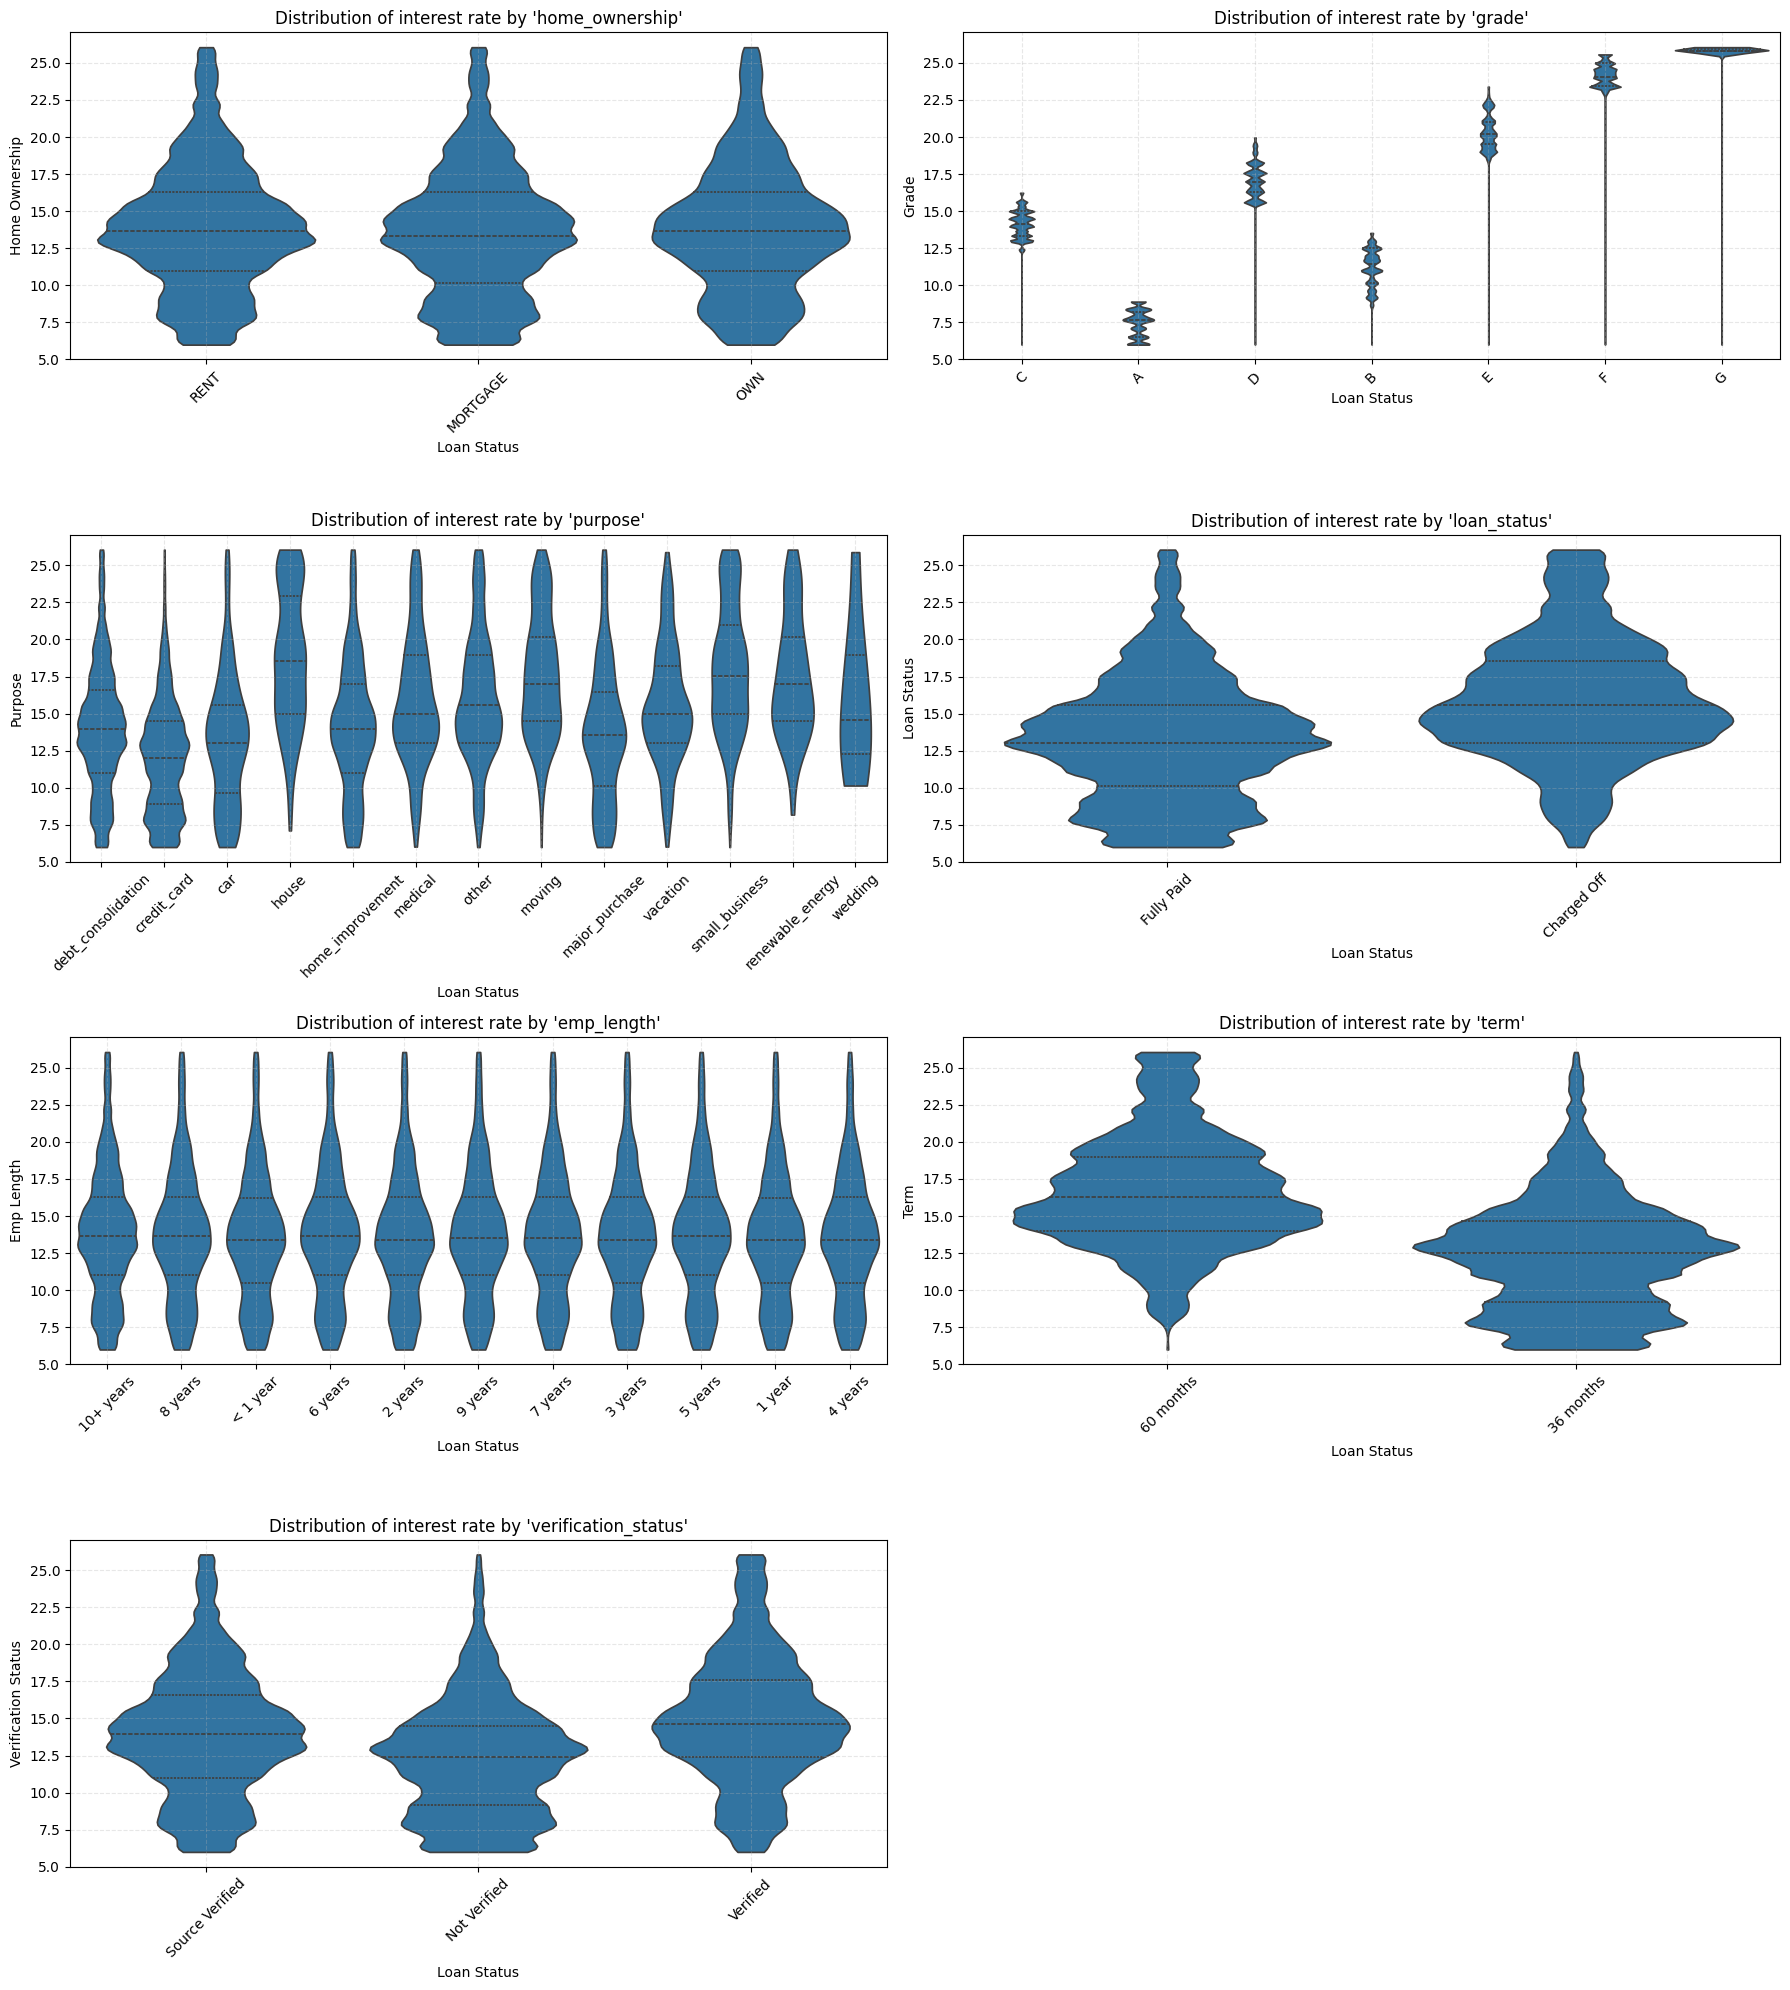

In [ ]:
# create violin plots to see how interest rates vary across categorical features

# Combine float and percentage columns
plot_cols = set(cat_cols) - set(['addr_state','zip_code','earliest_cr_line','last_pymnt_d'])
n_cols = 2  # number of plots per row
n_rows = math.ceil(len(plot_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for idx, col in enumerate(plot_cols):
    ax = axes[idx]
    sns.violinplot(data=final_data, x=col, y='int_rate', ax=ax, inner='quartile', cut=0)
    ax.set_title(f"Distribution of interest rate by '{col}'", fontsize=12)
    ax.set_xlabel("Loan Status", fontsize=10)
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Calculate returns for each loan

In [ ]:
### Define the names of the four returns we'll be calculating

ret_cols = ["ret_PESS", "ret_OPT", "ret_INTa", "ret_INTb", "ret_INTc", "ret_INTd"]

In [ ]:
## Remove all rows for loans that were paid back on the days
# they were issued
final_data['loan_length'] = (final_data.last_pymnt_d - final_data.issue_d) * 12 / np.timedelta64(365, 'D')

n_rows = len(final_data)
final_data = final_data[final_data.loan_length != 0]
print("Removed " + str(n_rows - len(final_data)) + " rows")

Removed 32 rows


#### Return Method 2 (pessimistic)

In [ ]:
# Calculate the return using a simple annualized profit margin
# Pessimistic fefinition (method 2)

final_data['term_num'] = final_data.term.str.extract('(\d+)',expand=False).astype(int)
final_data['ret_PESS'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['term_num'])

#### Return Method 1 (optimistic)

In [ ]:
# Assuming that if a loan gives a positive return, we can
# immediately find a similar loan to invest in; if the loan
# takes a loss, we use method 2 to compute the return

final_data['ret_OPT'] = ( (final_data.total_pymnt - final_data.funded_amnt)
                                            / final_data.funded_amnt ) * (12 / final_data['loan_length'])
final_data.loc[final_data.ret_OPT < 0,'ret_OPT'] = final_data.ret_PESS[final_data.ret_OPT < 0]

#### Return Method 3 (re-investment)

In [ ]:
def ret_method_3(T, i):
    '''
    Given an investment time horizon (in months) and re-investment
    interest rate, calculate the return of each loan
    '''

    # Assuming that the total amount paid back was paid at equal
    # intervals during the duration of the loan, calculate the
    # size of each of these installment
    actual_installment = (final_data.total_pymnt - final_data.recoveries) / final_data['loan_length']

    # Assuming the amount is immediately re-invested at the prime
    # rate, find the total amount of money we'll have by the end
    # of the loan
    cash_by_end_of_loan = actual_installment * (1 - pow(1 + i, final_data.loan_length)) / ( 1 - (1 + i) )

    cash_by_end_of_loan = cash_by_end_of_loan + final_data.recoveries

    # Assuming that cash is then re-invested at the prime rate,
    # with monthly re-investment, until T months from the start
    # of the loan
    remaining_months = T - final_data['loan_length']
    final_return = cash_by_end_of_loan * pow(1 + i, remaining_months)

    # Find the percentage return
    return( (12/T) * ( ( final_return - final_data['funded_amnt'] ) / final_data['funded_amnt'] ) )

final_data['ret_INTa'] = ret_method_3(5*12, 0.001)
final_data['ret_INTb'] = ret_method_3(5*12, 0.0025)
final_data['ret_INTc'] = ret_method_3(5*12, 0.005)
final_data['ret_INTd'] = ret_method_3(5*12, 0.00873)  #assumed given median annual interest rate is 10.99% which is the 25th percentile of inetrest rate distribution

In [ ]:
final_data.head().T

0             1  \
loan_amnt                              15000.0       10400.0   
funded_amnt                            15000.0       10400.0   
term                                 60 months     36 months   
int_rate                                 12.39          6.99   
installment                             336.64        321.08   
grade                                        C             A   
emp_length                           10+ years       8 years   
home_ownership                            RENT      MORTGAGE   
annual_inc                             78000.0       58000.0   
verification_status            Source Verified  Not Verified   
issue_d                             2014-12-01    2014-12-01   
loan_status                         Fully Paid   Charged Off   
purpose                     debt_consolidation   credit_card   
dti                                      12.03         14.92   
delinq_2yrs                                0.0           0.0   
earliest_cr_line                    1994-08-01    1989-09-01   
open_acc                                   6.0          17.0   
pub_rec                                    0.0           0.0   
revol_bal                             138008.0        6133.0   
revol_util                                29.0          31.6   
total_pymnt                           17392.37       6611.69   
last_pymnt_d                        2016-06-01    2016-08-01   
recoveries                                 0.0        521.27   
acc_now_delinq                             0.0           0.0   
addr_state                                  VA            CA   
bc_util                                    4.7          41.5   
collections_12_mths_ex_med                 0.0           0.0   
mort_acc                                   0.0           1.0   
num_bc_sats                                1.0           7.0   
num_bc_tl                                  2.0          18.0   
pct_tl_nvr_dlq                           100.0          83.3   
pub_rec_bankruptcies                       0.0           0.0   
tax_liens                                  0.0           0.0   
zip_code                                   235           937   
credit_line_loan_gap                 20.347945     25.265753   
loan_length                          18.016438     20.021918   
term_num                                    60            36   
ret_PESS                              0.031898      -0.12142   
ret_OPT                               0.106231      -0.12142   
ret_INTa                              0.043905     -0.066502   
ret_INTb                              0.063079     -0.056381   
ret_INTc                              0.098409     -0.037788   
ret_INTd                              0.160034     -0.005505   

                                             2             3                4  
loan_amnt                               7650.0       12800.0          21425.0  
funded_amnt                             7650.0       12800.0          21425.0  
term                                 36 months     60 months        60 months  
int_rate                                 13.66         17.14            15.59  
installment                              260.2        319.08           516.36  
grade                                        C             D                D  
emp_length                            < 1 year     10+ years          6 years  
home_ownership                            RENT      MORTGAGE             RENT  
annual_inc                             50000.0      125000.0          63800.0  
verification_status            Source Verified      Verified  Source Verified  
issue_d                             2014-12-01    2014-12-01       2014-12-01  
loan_status                        Charged Off    Fully Paid       Fully Paid  
purpose                     debt_consolidation           car      credit_card  
dti                                      34.81          8.31            18.49  
delinq_2yrs                 

In [ ]:
final_data[['ret_INTa','ret_INTb','ret_INTc','ret_INTd','ret_PESS','ret_OPT']].describe()

ret_INTa       ret_INTb       ret_INTc       ret_INTd  \
count  232851.000000  232851.000000  232851.000000  232851.000000   
mean        0.032669       0.048937       0.078745       0.130313   
std         0.055441       0.058213       0.063470       0.073107   
min        -0.195456      -0.195040      -0.194262      -0.192873   
25%         0.027500       0.044801       0.076652       0.130526   
50%         0.041876       0.059576       0.092345       0.148982   
75%         0.058329       0.076098       0.108566       0.165514   
max         0.184116       0.200039       0.228772       0.289513   

            ret_PESS        ret_OPT  
count  232851.000000  232851.000000  
mean        0.030825       0.062799  
std         0.070993       0.087620  
min        -0.323188      -0.323188  
25%         0.024304       0.048317  
50%         0.047220       0.078517  
75%         0.070774       0.111130  
max         0.175725       1.604010

### Understanding Grades

In [ ]:
# Make sure required columns are present
required_columns = ['grade', 'loan_amnt', 'int_rate', 'loan_status',
                    'ret_INTa', 'ret_INTb', 'ret_INTc', 'ret_INTd', 'ret_PESS', 'ret_OPT', 'term_num']

# Create binary charged-off column
final_data['is_charged_off'] = final_data['loan_status'].eq('Charged Off').astype(int)

# Total loans (for percentage calculation)
total_loans = len(final_data)

# Group by grade
aggregator = 'mean'
summary = final_data.groupby('grade').agg(
    pct_loans=('loan_amnt', lambda x: 100 * len(x) / total_loans),
    pct_default=('is_charged_off', lambda x: 100 * x.mean()),
    med_interest=('int_rate', aggregator),
    med_loan_amnt=('loan_amnt', aggregator),
    med_term=('term_num', aggregator),
    ret_INTa=('ret_INTa', aggregator),
    ret_INTb=('ret_INTb', aggregator),
    ret_INTc=('ret_INTc', aggregator),
    ret_INTd=('ret_INTd', aggregator),
    ret_PESS=('ret_PESS', aggregator),
    ret_OPT=('ret_OPT',aggregator)
).reset_index()

# Sort grades alphabetically
summary = summary.sort_values('grade').set_index('grade',drop=True)

summary['ret_INTa'] = summary['ret_INTa']*100
summary['ret_INTb'] = summary['ret_INTb']*100
summary['ret_INTc'] = summary['ret_INTc']*100
summary['ret_INTd'] = summary['ret_INTd']*100
summary['ret_PESS'] = summary['ret_PESS']*100
summary['ret_OPT'] = summary['ret_OPT']*100

# Optional: round values for cleaner display
summary = summary.round(2)

summary = summary.rename(columns={
    'pct_loans': '% of loans',
    'pct_default': '% Default',
    'med_interest': 'Med. interest',
    'av_interest': 'Av. interest',
    'med_term': 'Med. term',
    'med_loan_amnt': 'Med. loan amount',
    'ret_INTa': 'Intermediate 0.1%',
    'ret_INTb': 'Intermediate 0.25%',
    'ret_INTc': 'Intermediate 0.5%',
    'ret_INTd': 'Intermediate 0.87%',
    'ret_PESS': 'Pessimistic',
    'ret_OPT': 'Optimistic'
})

In [ ]:
summary.columns = pd.MultiIndex.from_tuples([
    ('% of loans',''),
    ('% Default',''),
    ('Med. interest',''),
    ('Med. loan amount',''),
    ('Med. term',''),
    ('Median Return %', 'Intermediate 0.1%'),
    ('Median Return %', 'Intermediate 0.25%'),
    ('Median Return %', 'Intermediate 0.5%'),
    ('Median Return %', 'Intermediate 0.87%'),
    ('Median Return %', 'Pessimistic'),
    ('Median Return %', 'Optimistic')
])
summary

% of loans % Default Med. interest Med. loan amount Med. term  \
                                                                      
grade                                                                 
A          15.40      5.39          7.47         14507.03     36.52   
B          26.33     11.10         11.19         13662.16     39.30   
C          28.24     18.54         14.15         14512.08     44.14   
D          18.20     25.32         17.12         16082.28     48.59   
E           8.49     32.79         20.36         17220.13     51.62   
F           2.62     36.64         24.25         16787.00     52.38   
G           0.71     43.69         25.86         19756.40     57.46   

        Median Return %                                       \
      Intermediate 0.1% Intermediate 0.25% Intermediate 0.5%   
grade                                                          
A                  2.55               4.17              7.15   
B                  3.13               4.77              7.79   
C                  3.39               5.02              8.00   
D                  3.66               5.27              8.23   
E                  3.61               5.22              8.16   
F                  3.75               5.39              8.38   
G                  3.17               4.75              7.66   

                                                 
      Intermediate 0.87% Pessimistic Optimistic  
grade                                            
A                  12.30        2.50       4.12  
B                  13.01        3.20       5.71  
C                  13.15        3.19       6.50  
D                  13.34        3.25       7.31  
E                  13.24        3.06       7.91  
F                  13.57        3.24       9.19  
G                  12.69        2.30       8.85

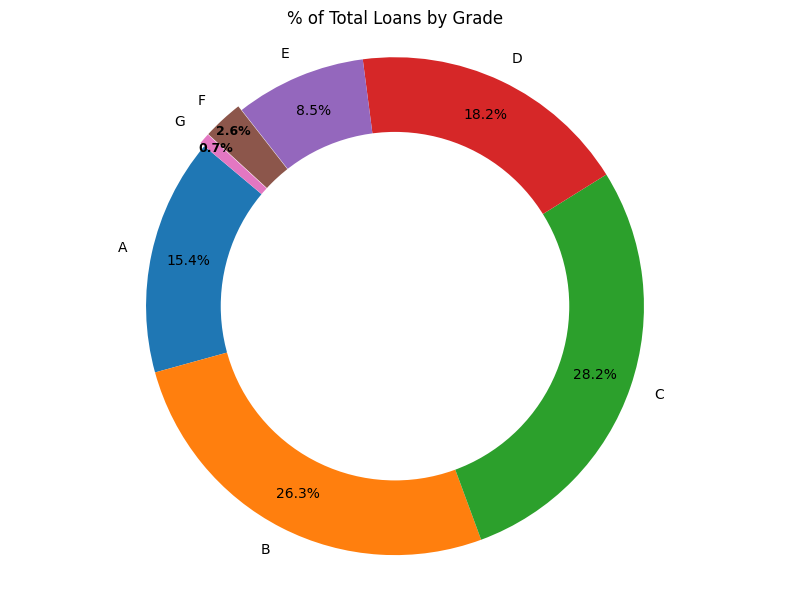

In [ ]:
import matplotlib.pyplot as plt

# Data
loan_dist = summary['% of loans']
labels = loan_dist.index
sizes = loan_dist.values

# Create pie data
explode = [0.02 if s < 5 else 0 for s in sizes]  # Slightly offset small slices

# Create plot with transparent background
fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
ax.set_facecolor('none')  # Transparent axes background

# Create pie
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    explode=explode,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
)

# Draw donut center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Annotate small slices
for i, a in enumerate(autotexts):
    value = sizes[i]
    if value < 5:
        a.set_position((1.1 * a.get_position()[0], 1.1 * a.get_position()[1]))
        a.set_fontsize(9)
        a.set_color('black')
        a.set_fontweight('bold')

# Title and layout
plt.title('% of Total Loans by Grade')
plt.axis('equal')
plt.tight_layout()
plt.show()



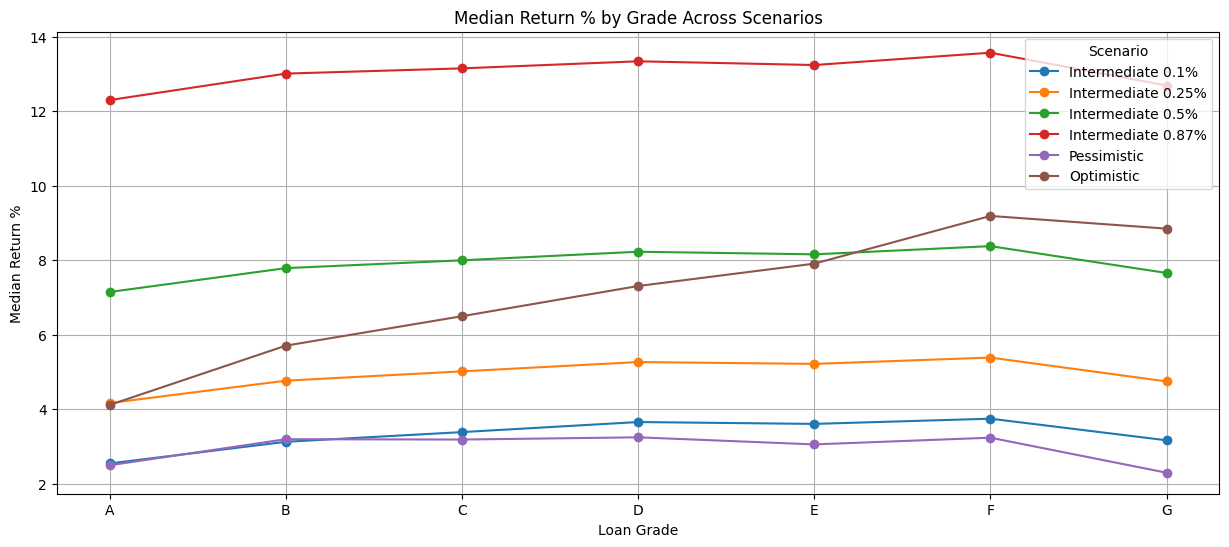

In [ ]:
# Extract return types
returns = summary['Median Return %']
returns.index.name = 'Grade'

# Line plot for return scenarios
plt.figure(figsize=(15, 6))
for col in returns.columns:
    plt.plot(returns.index, returns[col], marker='o', label=col)

plt.title('Median Return % by Grade Across Scenarios')
plt.xlabel('Loan Grade')
plt.ylabel('Median Return %')
plt.legend(title='Scenario')
plt.grid(True)
plt.show()


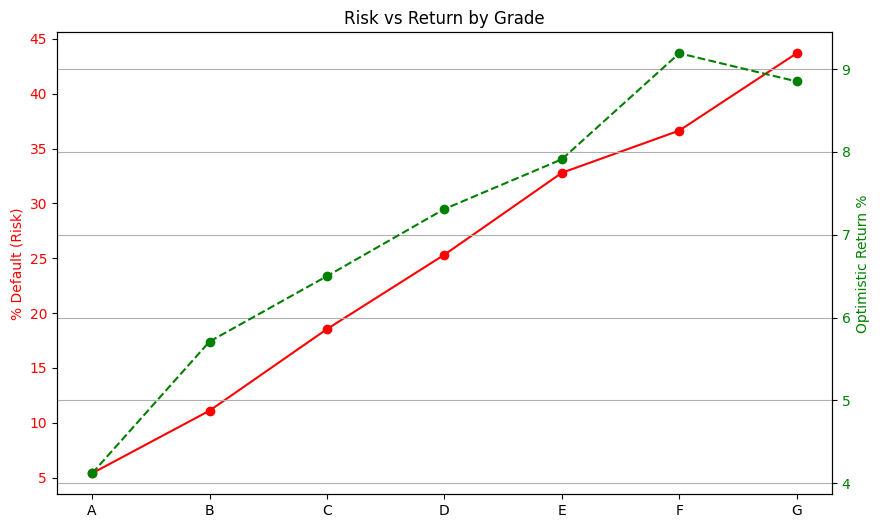

In [ ]:
# Dual axis: Default % vs Optimistic Return
fig, ax1 = plt.subplots(figsize=(10, 6))

grades = summary.index
default = summary['% Default']
optimistic = summary[('Median Return %', 'Optimistic')]

# Plot default %
ax1.plot(grades, default, 'r-o', label='% Default')
ax1.set_ylabel('% Default (Risk)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Plot return on second y-axis
ax2 = ax1.twinx()
ax2.plot(grades, optimistic, 'g--o', label='Optimistic Return')
ax2.set_ylabel('Optimistic Return %', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Risk vs Return by Grade')
plt.grid(True)
plt.show()


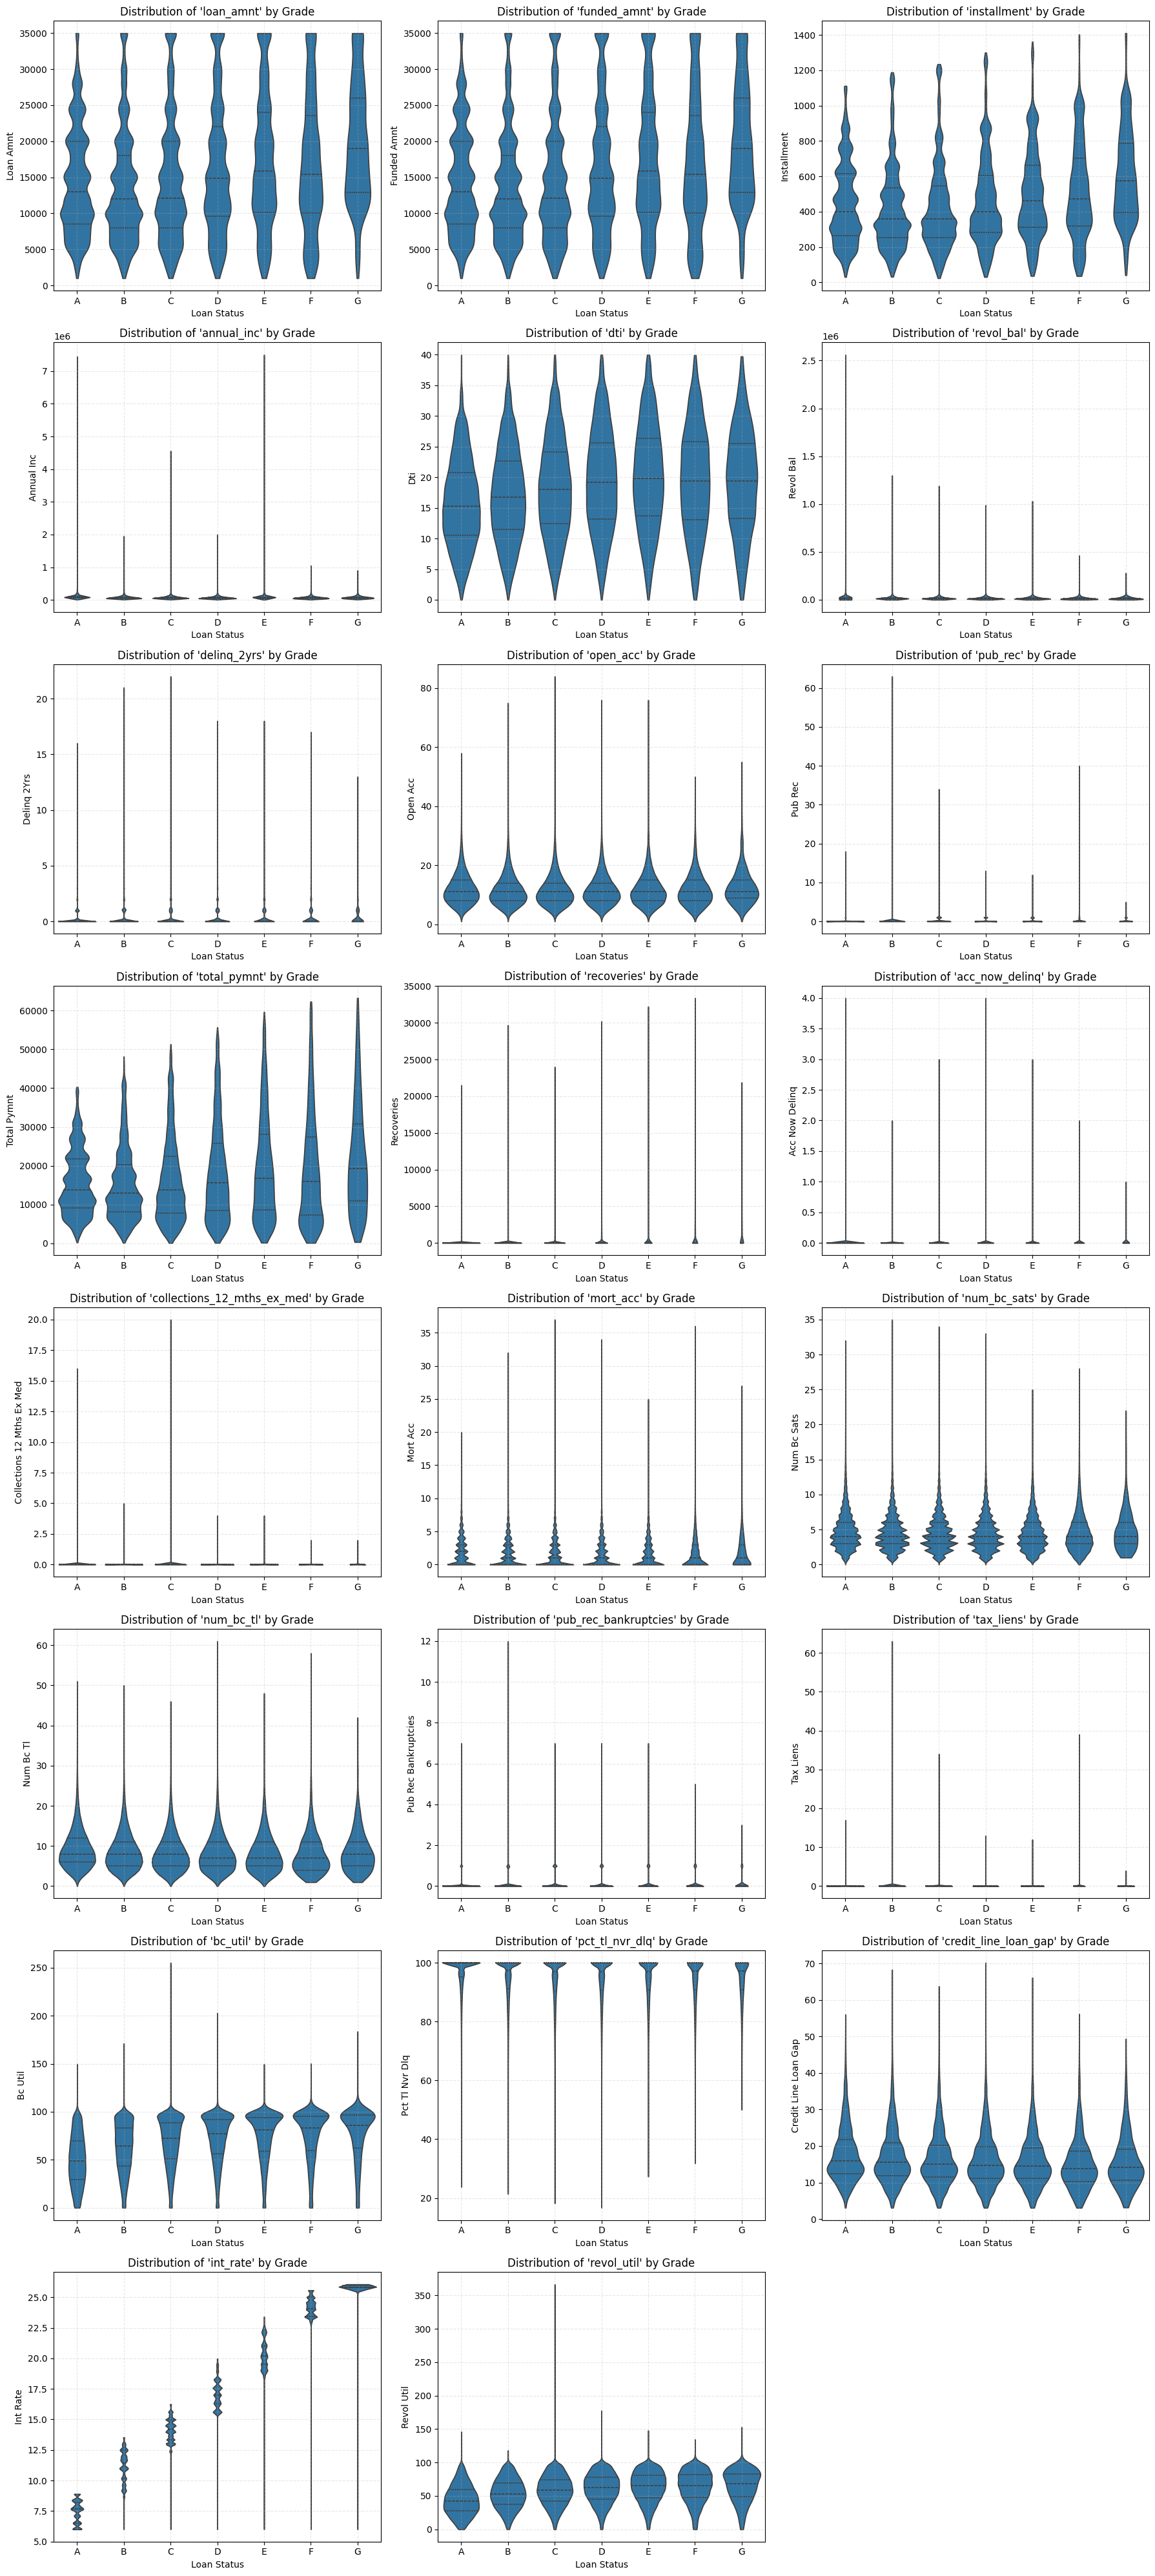

In [ ]:
# Create violin plots to see the distribution of each feature by loan grade

grade_order = sorted(final_data['grade'].dropna().unique())  # Sort grades alphabetically

# Combine float and percentage columns
plot_cols = float_cols + perc_cols
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(plot_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for idx, col in enumerate(plot_cols):
    ax = axes[idx]
    sns.violinplot(data=final_data, x='grade', y=col, ax=ax, inner='quartile', cut=0, order = grade_order)
    ax.set_title(f"Distribution of '{col}' by Grade", fontsize=12)
    ax.set_xlabel("Loan Status", fontsize=10)
    ax.set_ylabel(col.replace('_', ' ').title(), fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(axis='x')

# Hide any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

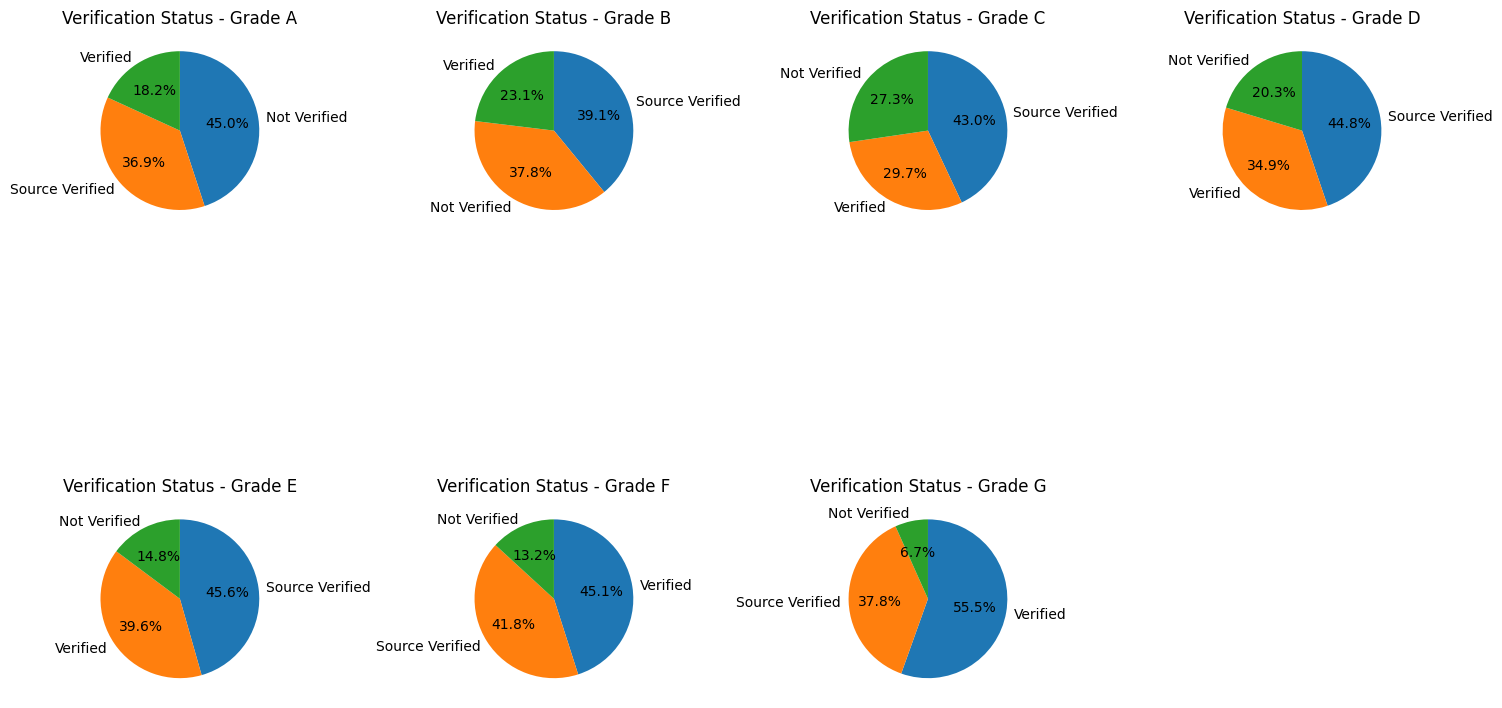

In [ ]:
# Create pie charts to see the distribution of verification by loan grade

grades = sorted(final_data['grade'].dropna().unique())

# Set up grid for pie charts: 3 columns
n_cols = 4
n_rows = (len(grades) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for idx, grade in enumerate(grades):
    ax = axes[idx]
    data = final_data[final_data['grade'] == grade]['verification_status'].value_counts()

    ax.pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    ax.set_title(f"Verification Status - Grade {grade}")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Load your dataset
df = final_data


# Columns to keep for analysis but NOT for clustering
exclude_from_clustering = [
    'term', 'grade', 'emp_length', 'issue_d', 'zip_code', 'purpose', 'recoveries','funded_amnt', 'tax_liens', 'collections_12_mths_ex_med', 'addr_state'
]

# Columns to use for clustering (selected based on grade distribution)
selected_features = [
    'int_rate',
    'dti',
    'installment',
    'loan_amnt',
    'total_pymnt',
    'term_num',
    'home_ownership',
    'verification_status'
]

# Save grade and excluded columns for evaluation later
compare_cols = df[exclude_from_clustering].copy()

# Extract only selected features for clustering
df_cluster = df[selected_features].copy()

# Encode categorical columns if any are still included (safety step)
categorical_cols = df_cluster.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col].astype(str))
    label_encoders[col] = le

# Drop constant columns (no variance)
nunique = df_cluster.nunique()
df_cluster = df_cluster.loc[:, nunique > 1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
#X_scaled = df_cluster

# Run KMeans clustering
k = compare_cols["grade"].nunique()
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add clustering results to comparison DataFrame
compare_cols["cluster"] = clusters


# Evaluate clustering performance
label_encoder = LabelEncoder()
encoded_grades = label_encoder.fit_transform(compare_cols["grade"])

for col, le in label_encoders.items():
    print(f"\nEncoding for column: '{col}'")
    mapping = dict(zip(range(len(le.classes_)), le.classes_))
    for code, category in mapping.items():
        print(f"  {code} → {category}")


Encoding for column: 'home_ownership'
  0 → MORTGAGE
  1 → OWN
  2 → RENT

Encoding for column: 'verification_status'
  0 → Not Verified
  1 → Source Verified
  2 → Verified


In [ ]:
# Create crosstab
crosstab = pd.crosstab(compare_cols["cluster"], compare_cols["grade"])

# Convert to percentages **per grade (column-wise)**
crosstab_percent = crosstab.divide(crosstab.sum(axis=0), axis=1) * 100

# Round for easier reading
crosstab_percent = crosstab_percent.round(2)
'''
print("\nCross-tabulation (percentage by grade):")
print(crosstab_percent)
'''
crosstab

grade        A      B      C     D     E     F    G
cluster                                            
0        10007  10474   8150  3561   841    86   11
1        13500  16751   9839  3016   607   137    5
2          532   4755  10738  8539  4155  1122  382
3         2793   8434  11647  7911  3588  1158   95
4           80   1748   5201  6701  4623  1654  614
5         8846  17339  13832  5546  1546   348   10
6          102   1811   6359  7109  4410  1600  538

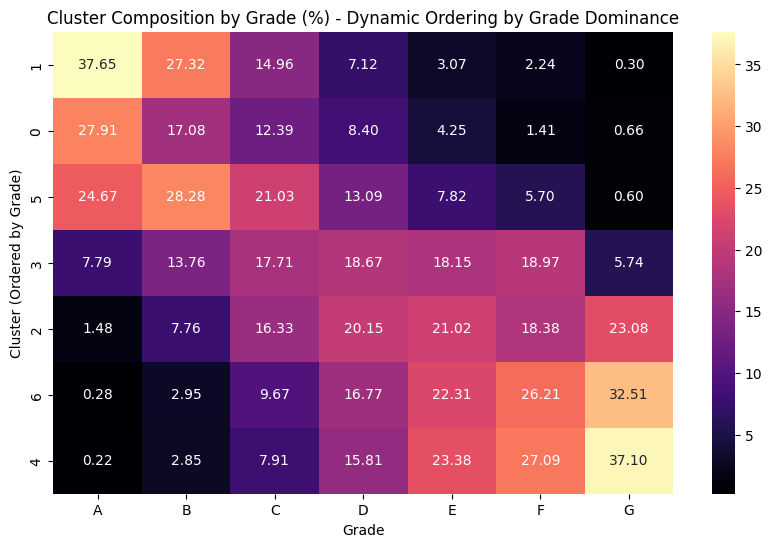

In [ ]:
# Step 1: Get the cluster (index) with max percentage for each grade
dominant_clusters = crosstab_percent.idxmax()

# Step 2: Convert to list and remove duplicates while preserving order
ordering = ordering = crosstab_percent['A'].sort_values(ascending=False).index.tolist()

# Step 3: Reindex using this new ordering
crosstab_ordered = crosstab_percent.loc[ordering]

# Step 4: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_ordered, annot=True, fmt=".2f", cmap="magma")
plt.title("Cluster Composition by Grade (%) - Dynamic Ordering by Grade Dominance")
plt.ylabel("Cluster (Ordered by Grade)")
plt.xlabel("Grade")
plt.show()

The heatmap above shows the distribution of loan grades across each cluster, highlighting that some clusters overlap with multiple grades. This overlap likely arises from missing predictive features (e.g., credit/FICO scores) that would otherwise help separate these groups more clearly. Consequently, while each cluster is associated most closely with a particular grade, there is some spillover into neighboring grades.

**Parallel Line Plots**

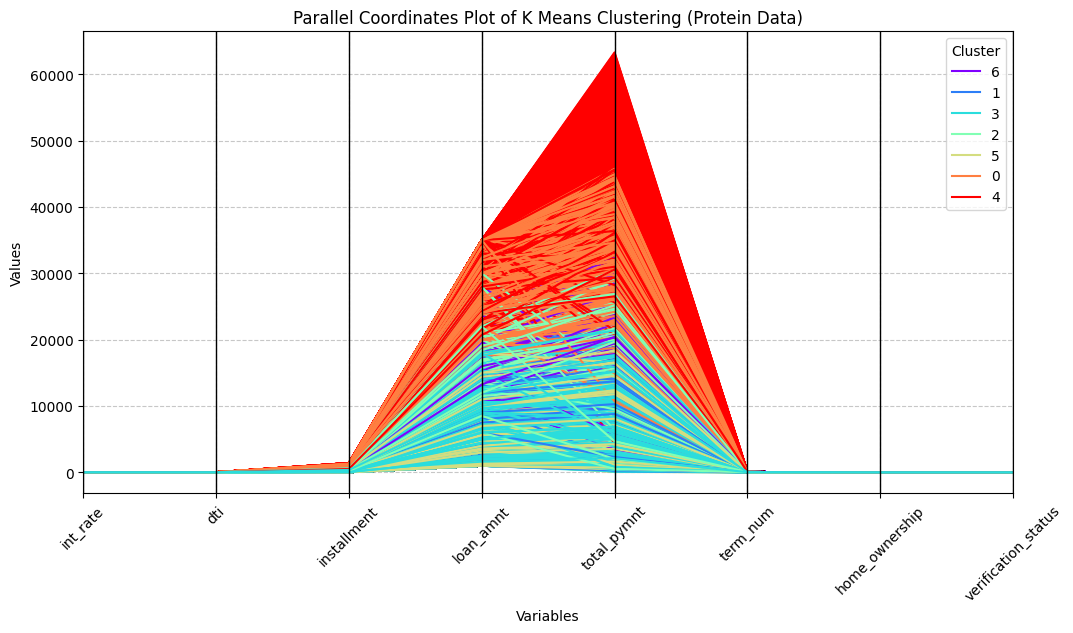

In [ ]:
from pandas.plotting import parallel_coordinates

labels = kmeans.labels_

# Add cluster labels to the dataframe
df_cluster['Cluster'] = labels

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df_cluster, 'Cluster', color=plt.cm.rainbow(np.linspace(0, 1, 7)))
plt.title('Parallel Coordinates Plot of K Means Clustering (Protein Data)')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
cluster_centers_df = pd.DataFrame( kmeans.cluster_centers_,columns=['int_rate',
    'dti',
    'installment',
    'loan_amnt',
    'total_pymnt',
    'term_num',
    'home_ownership',
    'verification_status'])
# Dynamically assign cluster labels
cluster_centers_df['Cluster'] = [f'Cluster {i}' for i in range(kmeans.n_clusters)]

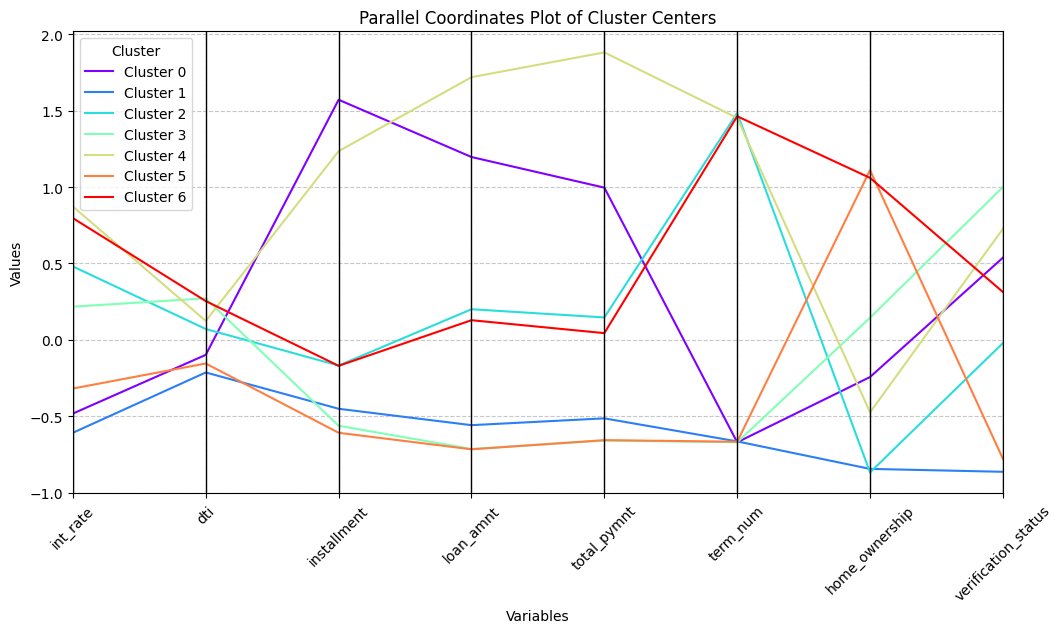

In [ ]:
plt.figure(figsize=(12, 6))
parallel_coordinates(cluster_centers_df, 'Cluster', color=plt.cm.rainbow(np.linspace(0, 1, 7)))
plt.title('Parallel Coordinates Plot of Cluster Centers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster')
plt.show()

In [ ]:
final_data['cluster'] = clusters

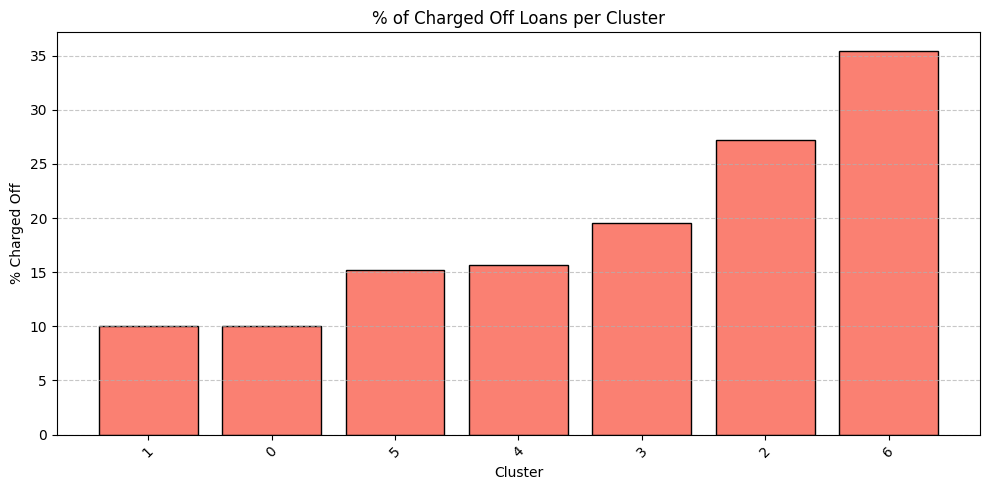

In [ ]:
# Calculate and visualize the % of charged-off loans per cluster

# Step 1: Create a copy with clusters and loan_status
cluster_loan_status = final_data[['cluster', 'loan_status']].copy()

# Step 2: Count total loans per cluster
total_per_cluster = cluster_loan_status.groupby('cluster').size()

# Step 3: Count only 'Charged Off' loans per cluster
charged_off_per_cluster = cluster_loan_status[cluster_loan_status['loan_status'] == 'Charged Off'].groupby('cluster').size()

# Step 4: Compute percentage
charged_off_pct = (charged_off_per_cluster / total_per_cluster * 100).round(2)

# Step 5: Combine into a clean DataFrame
charged_off_summary = pd.DataFrame({
    'Total Loans': total_per_cluster,
    'Charged Off Loans': charged_off_per_cluster,
    '% Charged Off': charged_off_pct
}).fillna(0)  # Fill clusters with 0 charged off

# Sort by % Charged Off in ascending order
charged_off_sorted = charged_off_summary.sort_values('% Charged Off')

# Plot
plt.figure(figsize=(10, 5))
plt.bar(charged_off_sorted.index.astype(str), charged_off_sorted['% Charged Off'], color='salmon', edgecolor='black')
plt.title('% of Charged Off Loans per Cluster')
plt.xlabel('Cluster')
plt.ylabel('% Charged Off')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Principle Component Analysis**

In [ ]:
from sklearn.decomposition import PCA

pca_grades = PCA()
pcgrades = pca_grades.fit_transform(X_scaled)
print(np.round(pca_grades.components_.T, 1))

[[ 0.2  0.7 -0.  -0.2 -0.   0.7  0.1  0.1]
 [ 0.   0.4 -0.1  0.9 -0.  -0.1  0.  -0. ]
 [ 0.5 -0.3  0.2  0.1 -0.1  0.3 -0.4 -0.6]
 [ 0.5 -0.2  0.1  0.  -0.1 -0.  -0.4  0.7]
 [ 0.5 -0.1  0.   0.  -0.2 -0.1  0.8 -0. ]
 [ 0.3  0.5 -0.3 -0.3 -0.3 -0.6 -0.2 -0.2]
 [-0.2  0.2  0.9 -0.  -0.4 -0.1 -0.   0. ]
 [ 0.3  0.2  0.4 -0.1  0.8 -0.3  0.  -0. ]]


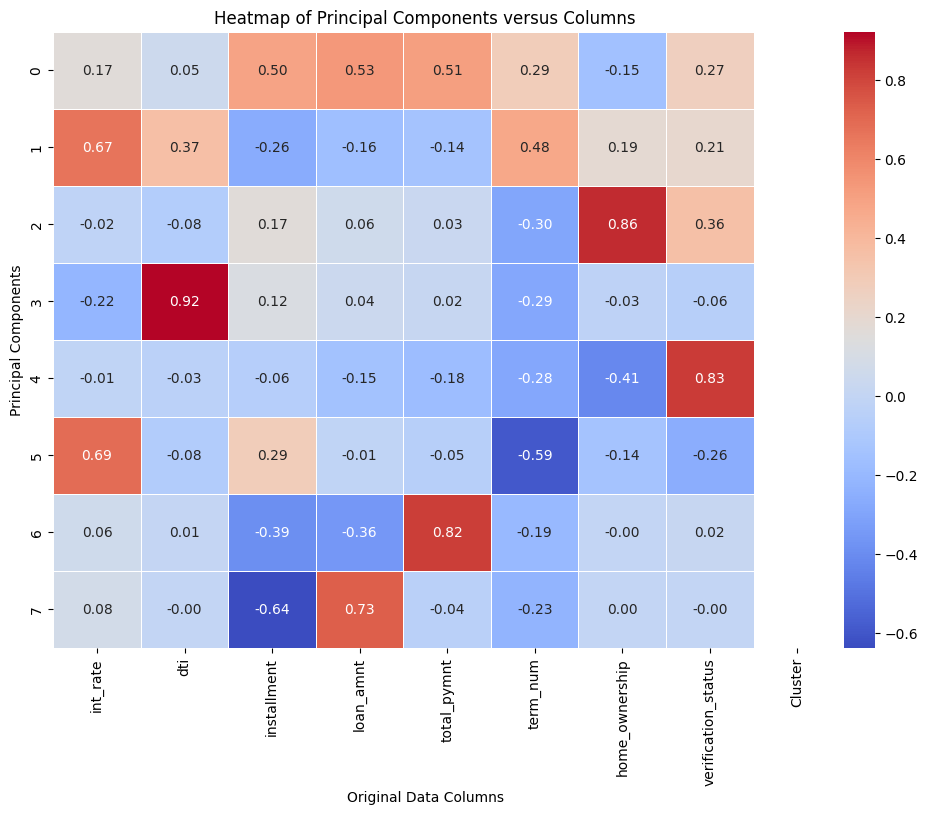

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(pca_grades.components_, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, xticklabels=df_cluster.columns)
plt.title('Heatmap of Principal Components versus Columns')
plt.xlabel('Original Data Columns')
plt.ylabel('Principal Components')
plt.show()

This heatmap shows the strength and direction of each original variable’s contribution to each principal component (red = positive correlation, blue = negative correlation). It highlights which variables most strongly define each component and how those variables align (or oppose) each other.

[0.40274872 0.17488273 0.12140121 0.11700576 0.09920972 0.06522987
 0.01846629 0.0010557 ]
[0.40274872 0.57763145 0.69903266 0.81603842 0.91524814 0.98047802
 0.9989443  1.        ]


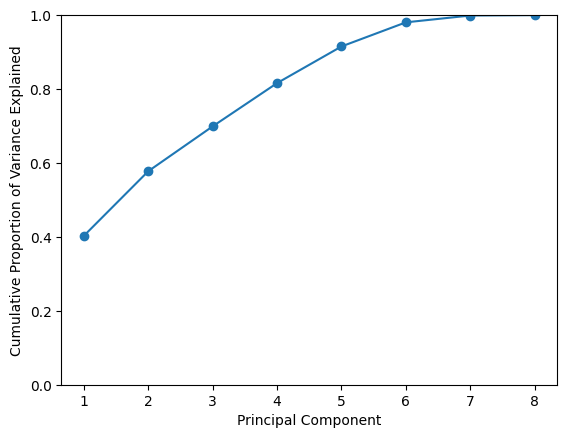

In [ ]:
# Explained variance
explained_variance_ratio = pca_grades.explained_variance_ratio_
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio)

# Plot cumulative explained variance
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.ylim(0, 1)
plt.show()

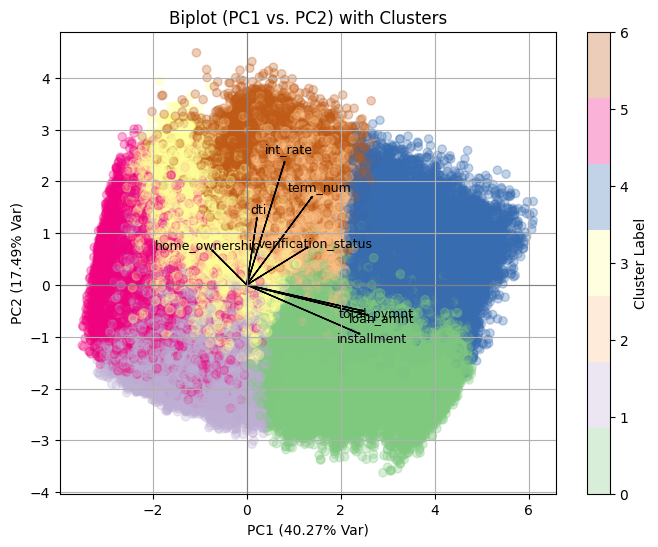

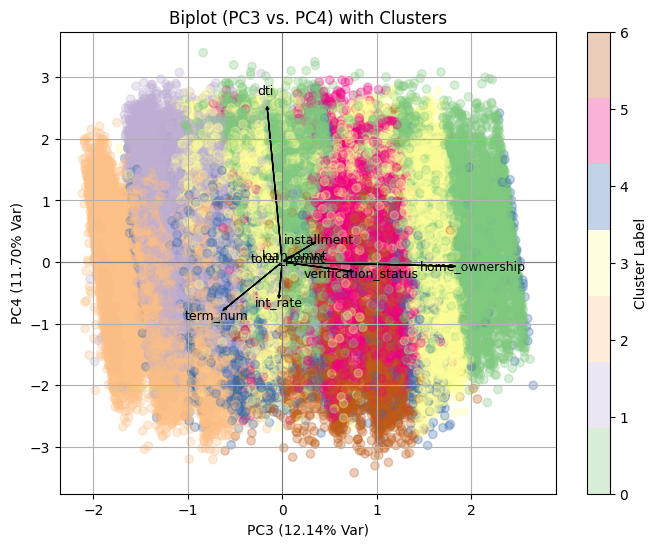

In [ ]:
cluster_labels = kmeans.labels_

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

def biplot_clusters(scores, loadings, cluster_labels, pc_x=0, pc_y=1,
                    feature_labels=None, var_explained=None):

    fig, ax = plt.subplots(figsize=(8, 6))

    # Determine number of distict clusters distinct clusters you have
    unique_clusters = np.unique(cluster_labels)
    n_clusters = len(unique_clusters)

    palette = sns.color_palette("Accent", n_clusters)
    cmap = mcolors.ListedColormap(palette.as_hex())

    # Scatter plot of the scores
    scatter = ax.scatter(
        scores[:, pc_x], scores[:, pc_y],
        c=cluster_labels, cmap=cmap,
        alpha=0.3
    )

    cbar = plt.colorbar(scatter, ax=ax, ticks=unique_clusters)
    cbar.set_label('Cluster Label')

    # Extract the loadings for the chosen PCs
    x_loadings = loadings[pc_x, :]
    y_loadings = loadings[pc_y, :]

    # Suitable Scaling factor for arrow visibility
    x_max = max(abs(scores[:, pc_x]))
    y_max = max(abs(scores[:, pc_y]))
    arrow_size = 0.8  # factor to control overall arrow length

    # Draw arrows
    for i in range(len(x_loadings)):
        ax.arrow(
            0, 0,
            x_loadings[i] * x_max * arrow_size,
            y_loadings[i] * y_max * arrow_size,
            color='black', alpha=1.0,
            head_width=0.03, length_includes_head=True
        )

        # Label each arrow
        if feature_labels is not None:
            ax.text(
                x_loadings[i] * x_max * arrow_size * 1.1,
                y_loadings[i] * y_max * arrow_size * 1.1,
                feature_labels[i],
                color='black', ha='center', va='center', fontsize=9
            )

    #Axes labels with variance explained
    if var_explained is not None:
        ax.set_xlabel(f"PC{pc_x+1} ({var_explained[pc_x]*100:.2f}% Var)")
        ax.set_ylabel(f"PC{pc_y+1} ({var_explained[pc_y]*100:.2f}% Var)")
    else:
        ax.set_xlabel(f"PC{pc_x+1}")
        ax.set_ylabel(f"PC{pc_y+1}")

    ax.set_title(f"Biplot (PC{pc_x+1} vs. PC{pc_y+1}) with Clusters")
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.axvline(0, color='grey', linewidth=0.8)
    ax.grid(True)
    plt.show()

# Biplot for PC1 vs PC2
biplot_clusters(
    scores=pcgrades,
    loadings=pca_grades.components_,
    cluster_labels=cluster_labels,  # from your K-Means or other clustering
    pc_x=0, pc_y=1,
    feature_labels=df_cluster.columns,  # or list of your feature names
    var_explained=pca_grades.explained_variance_ratio_
)

# Biplot for PC3 vs PC4
biplot_clusters(
    scores=pcgrades,
    loadings=pca_grades.components_,
    cluster_labels=cluster_labels,
    pc_x=2, pc_y=3,
    feature_labels=df_cluster.columns,
    var_explained=pca_grades.explained_variance_ratio_
)

The third and fourth principal components uncover smaller but still meaningful patterns that weren’t captured by PC1 and PC2.

Variables like interest rate, home ownership, and verification reappear here in different orientations, indicating finer-grained differences in borrower characteristics and loan structure.

These components add additional context about the loans/borrowers once you account for the main variation in loan size and borrower risk.

## Alternate Clustering

We investigated a different clustering. We applied k-means with three clusters to group the loan grades into good, bad, and neutral categories. This coarse-grained segmentation helped capture the main differences among grades and led to more interpretable groupings.


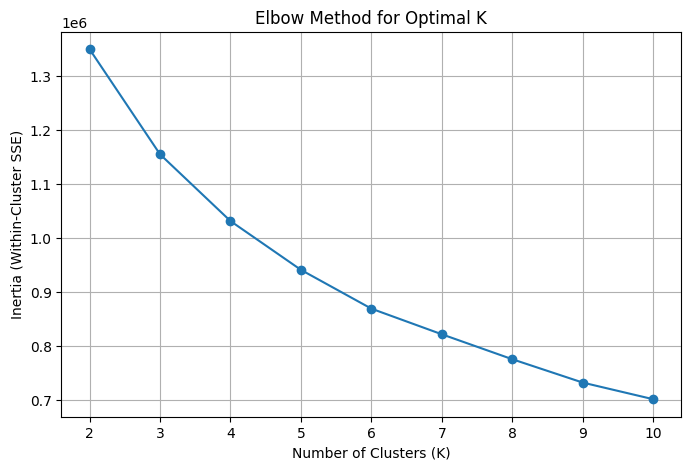


Encoding for column: 'home_ownership'
  0 → MORTGAGE
  1 → OWN
  2 → RENT

Encoding for column: 'verification_status'
  0 → Not Verified
  1 → Source Verified
  2 → Verified


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Load your dataset
df = final_data

# Columns to keep for analysis but NOT for clustering
exclude_from_clustering = [
    'term', 'grade', 'emp_length', 'issue_d', 'zip_code', 'purpose', 'recoveries',
    'funded_amnt', 'tax_liens', 'collections_12_mths_ex_med', 'addr_state'
]

# Columns to use for clustering (selected based on grade distribution)
selected_features = [
    'int_rate',
    'dti',
    'installment',
    'loan_amnt',
    'total_pymnt',
    'term_num',
    'home_ownership',
    'verification_status'
]

# Save grade and excluded columns for evaluation later
compare_cols = df[exclude_from_clustering].copy()

# Extract only selected features for clustering
df_cluster = df[selected_features].copy()

# Encode categorical columns if any are still included
categorical_cols = df_cluster.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cluster[col] = le.fit_transform(df_cluster[col].astype(str))
    label_encoders[col] = le

# Drop constant columns (no variance)
nunique = df_cluster.nunique()
df_cluster = df_cluster.loc[:, nunique > 1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Loop over different k values to build the elbow (knee) plot
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=16, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xticks(k_range)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.grid(True)
plt.show()

# Optional: Show encoding mappings
label_encoder = LabelEncoder()
encoded_grades = label_encoder.fit_transform(compare_cols["grade"])

for col, le in label_encoders.items():
    print(f"\nEncoding for column: '{col}'")
    mapping = dict(zip(range(len(le.classes_)), le.classes_))
    for code, category in mapping.items():
        print(f"  {code} → {category}")

In [ ]:
# Run KMeans clustering
k = compare_cols["grade"].nunique()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add clustering results to comparison DataFrame
compare_cols["cluster"] = clusters

# Evaluate clustering performance
label_encoder = LabelEncoder()
encoded_grades = label_encoder.fit_transform(compare_cols["grade"])

# Create crosstab
crosstab = pd.crosstab(compare_cols["cluster"], compare_cols["grade"])

# Convert to percentages **per grade (column-wise)**
crosstab_percent = crosstab.divide(crosstab.sum(axis=0), axis=1) * 100

# Round for easier reading
crosstab_percent = crosstab_percent.round(2)
'''
print("\nCross-tabulation (percentage by grade):")
print(crosstab_percent)
'''
crosstab

grade        A      B      C      D      E     F     G
cluster                                               
0         9393  12310  12990   9229   4275  1175   375
1        25952  42889  35328  16137   5412  1423    78
2          515   6113  17448  17017  10083  3507  1202

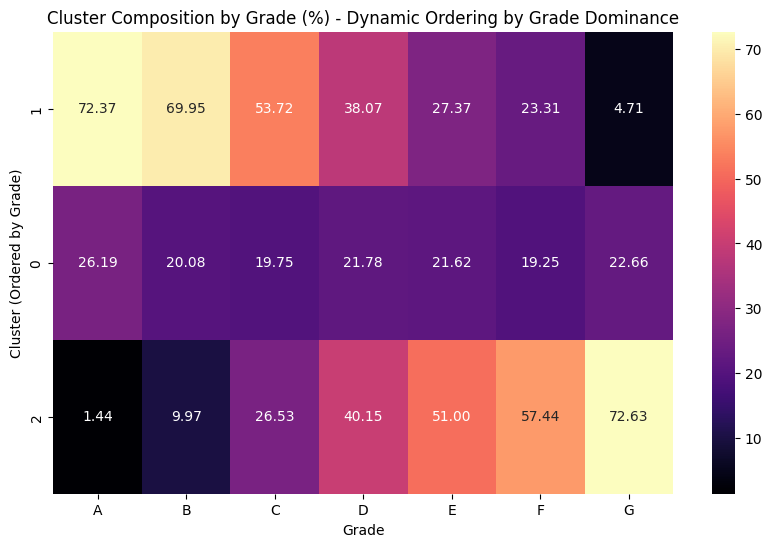

In [ ]:
# Step 1: Get the cluster (index) with max percentage for each grade
dominant_clusters = crosstab_percent.idxmax()

# Step 2: Convert to list and remove duplicates while preserving order
ordering = ordering = crosstab_percent['A'].sort_values(ascending=False).index.tolist()

# Step 3: Reindex using this new ordering
crosstab_ordered = crosstab_percent.loc[ordering]

# Step 4: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_ordered, annot=True, fmt=".2f", cmap="magma")
plt.title("Cluster Composition by Grade (%) - Dynamic Ordering by Grade Dominance")
plt.ylabel("Cluster (Ordered by Grade)")
plt.xlabel("Grade")
plt.show()

Cluster 1 is predominantly composed of lower‐risk loan grades (A, B, C), while Cluster 2 captures a high proportion of the riskiest grade G (72.63%). Cluster 0 has a more balanced mix across the mid‐range grades, suggesting it falls between the other two clusters in terms of risk profile.